# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Giselle Halim
- **Email:** gisellehalim27@gmail.com
- **ID Dicoding:** gisellehalim

# **Menentukan Pertanyaan Bisnis**

- Seberapa puas customer dengan pelayanan toko?
- Apakah order selalu dijalankan?
- Dimanakah kota dan states dengan customer serta seller terbanyak?
- Berapa banyak customer yang aktif melakukan transaksi?
- Berapa banyak jumlah order yang dilakukan customer?
- Berapa banyak jumlah order yang diterima seller?
- Bagaimana performa penjualan dan revenue perusahaan?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana performa penjualan di setiap kota dan state?
- Bagaimana behaviour customer dalam melakukan pembayaran?
- Apakah ada korelasi antar berat produk dengan harga pengiriman?
- Berapa lama respon seller dan ekspedisi dalam memproses order?
- Berapa lama respon seller dalam membalas review?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering and Cleaning

In [ ]:
sellers = pd.read_csv('sellers_dataset.csv')
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
customers = pd.read_csv('customers_dataset.csv')
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
location = pd.read_csv('geolocation_dataset.csv')
location.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [ ]:
product_trs = pd.read_csv('product_category_name_translation.csv')
product_trs.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
product_dataset = pd.read_csv('products_dataset.csv')
product_dataset.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
order_items = pd.read_csv('order_items_dataset.csv')
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
order_payments = pd.read_csv('order_payments_dataset.csv')
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
order_reviews = pd.read_csv('order_reviews_dataset.csv')
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
order_dataset = pd.read_csv('orders_dataset.csv')
order_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

## Assessing & Cleaning Data

### Menilai Data sellers

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Menilai Data customers

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
print("Jumlah duplikasi: ",customers.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Menilai Data location

In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
print("Jumlah duplikasi: ", location.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
location.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", location.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


### Menilai Data product_trs

In [ ]:
product_trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_trs.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Menilai Data product_dataset

In [ ]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_dataset = product_dataset.dropna()
product_dataset

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32340 rows x 9 columns]

In [ ]:
print("Jumlah duplikasi: ", product_dataset.duplicated().sum())
product_dataset.describe()

Jumlah duplikasi:  0


product_name_lenght  product_description_lenght  product_photos_qty  \
count         32340.000000                32340.000000        32340.000000   
mean             48.476592                  771.492393            2.188961   
std              10.245699                  635.124831            1.736787   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32340.000000       32340.000000       32340.000000   
mean        2276.956586          30.854545          16.958813   
std         4279.291845          16.955965          13.636115   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32340.000000  
mean          23.208596  
std           12.078762  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [ ]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [ ]:
# Membuat mapping untuk terjemahan
mapping_dict = dict(zip(product_trs["product_category_name"], product_trs["product_category_name_english"]))

# Mengganti nama kategori produk menjadi bahasa Inggris
product_dataset["product_category_name"] = product_dataset["product_category_name"].map(mapping_dict)

In [ ]:
product_dataset.isna().sum()

product_id                     0
product_category_name         13
product_name_lenght            0
product_description_lenght     0
product_photos_qty             0
product_weight_g               0
product_length_cm              0
product_height_cm              0
product_width_cm               0
dtype: int64

In [ ]:
product_dataset = product_dataset.dropna()

### Menilai Data order_items

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

### Menilai Data order_payments

In [ ]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", order_payments.duplicated().sum())
order_payments.describe()

Jumlah duplikasi:  0


payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

### Menilai Data order_reviews

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#order_reviews = order_reviews.dropna()

In [ ]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())

Jumlah duplikasi:  0


### Menilai Data order_dataset

In [ ]:
order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
order_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order_dataset = order_dataset.dropna()

In [ ]:
print("Jumlah duplikasi: ", order_dataset.duplicated().sum())

Jumlah duplikasi:  0


## Merging

In [ ]:
df = order_dataset.merge(order_items, on='order_id')
df = df.merge(order_payments, on='order_id')
df = df.merge(product_dataset, on='product_id')
df = df.merge(sellers, on='seller_id')
df = df.merge(customers, on='customer_id')

In [ ]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2017-08-28 00:00:00              1   
4           2017-08-15 00:00:00              1   

                         product_id  ... product_length_cm product_height_cm  \
0  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
1  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
2  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
3  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
4  87285b34884572647811a353c7ac498a  ...              19.0               8.0   

   product_width_cm  seller_zip_code_prefix  seller_city seller_state  \
0              13.0                    9350         maua           SP   
1              13.0                    9350         maua           SP   
2              13.0                    9350         maua           SP   
3              13.0                    9350         maua           SP   
4              13.0                    9350         maua           SP   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  3a51803cc0d012c3b5dc8b7528cb05f7                      3366     sao paulo   
4  ef0996a1a279c26e7ecbd737be23d235                      2290     sao paulo   

   customer_state  
0              SP  
1              SP  
2              SP  
3              SP  
4              SP  

[5 rows x 33 columns]

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   order_item_id                  113367 non-null  int64  
 9   product_id                     113367 non-null  object 
 10  seller_id                      113367 non-null  object 
 11  shipping_limit_date            113367 non-null  object 
 12  price                         

In [ ]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state        

In [ ]:
df.describe()

order_item_id          price  freight_value  payment_sequential  \
count  113367.000000  113367.000000  113367.000000       113367.000000   
mean        1.196856     120.161067      20.024231            1.089947   
std         0.701325     182.714900      15.753323            0.682120   
min         1.000000       0.850000       0.000000            1.000000   
25%         1.000000      39.900000      13.080000            1.000000   
50%         1.000000      74.900000      16.320000            1.000000   
75%         1.000000     133.700000      21.200000            1.000000   
max        21.000000    6735.000000     409.680000           26.000000   

       payment_installments  payment_value  product_name_lenght  \
count         113367.000000  113367.000000        113367.000000   
mean               2.942532     172.222013            48.800427   
std                2.777846     266.576121            10.018615   
min                0.000000       0.000000             5.000000   
25%                1.000000      61.000000            42.000000   
50%                2.000000     108.140000            52.000000   
75%                4.000000     189.370000            57.000000   
max               24.000000   13664.080000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               113367.000000       113367.000000     113367.000000   
mean                   785.794746            2.209241       2110.532633   
std                    651.018280            1.720307       3770.553691   
min                      4.000000            1.000000          0.000000   
25%                    346.000000            1.000000        300.000000   
50%                    601.000000            1.000000        700.000000   
75%                    985.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  \
count      113367.000000      113367.000000     113367.000000   
mean           30.282834          16.617411         23.099694   
std            16.161733          13.448605         11.741288   
min             7.000000           2.000000          6.000000   
25%            18.000000           8.000000         15.000000   
50%            25.000000          13.000000         20.000000   
75%            38.000000          20.000000         30.000000   
max           105.000000         105.000000        118.000000   

       seller_zip_code_prefix  customer_zip_code_prefix  
count           113367.000000             113367.000000  
mean             24513.914772              35081.859236  
std              27638.211594              29845.463618  
min               1001.000000               1003.000000  
25%               6429.000000              11320.000000  
50%              13660.000000              24325.000000  
75%              28495.000000              58775.000000  
max              99730.000000              99980.000000

In [ ]:
# Mengubah format data tanggal
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
df['order_approved_at'] = pd.to_datetime(df['order_approved_at']).dt.date
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date']).dt.date
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date']).dt.date
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date']).dt.date
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp']).dt.date

In [ ]:
df

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
113362  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
113363  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
113364  ba4ff7bab012df64eed239c402ba6a0d  48ebd9467fef647e9a0cd9c1b9bdbe24   
113365  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
113366  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status order_purchase_timestamp order_approved_at  \
0         delivered               2017-10-02        2017-10-02   
1         delivered               2017-10-02        2017-10-02   
2         delivered               2017-10-02        2017-10-02   
3         delivered               2017-08-15        2017-08-15   
4         delivered               2017-08-02        2017-08-02   
...             ...                      ...               ...   
113362    delivered               2018-07-01        2018-07-05   
113363    delivered               2018-07-24        2018-07-24   
113364    delivered               2018-01-11        2018-01-11   
113365    delivered               2018-05-22        2018-05-22   
113366    delivered               2018-05-15        2018-05-16   

       order_delivered_carrier_date order_delivered_customer_date  \
0                        2017-10-04                    2017-10-10   
1                        2017-10-04                    2017-10-10   
2                        2017-10-04                    2017-10-10   
3                        2017-08-17                    2017-08-18   
4                        2017-08-04                    2017-08-07   
...                             ...                           ...   
113362                   2018-07-04                    2018-07-09   
113363                   2018-07-24                    2018-08-02   
113364                   2018-01-22                    2018-01-30   
113365                   2018-05-24                    2018-06-12   
113366                   2018-05-16                    2018-05-21   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2017-08-28              1   
4                         2017-08-15              1   
...                              ...            ...   
113362                    2018-07-20              1   
113363                    2018-08-16              1   
113364                    2018-02-09              1   
113365                    2018-06-08              1   
113366                    2018-05-29              1   

                              product_id  ... product_length_cm  \
0       87285b34884572647811a353c7ac498a  ...              19.0   
1       87285b34884572647811a353c7ac498a  ...              19.0   
2       87285b34884572647811a353c7ac498a  ...              19.0   
3       87285b34884572647811a353c7ac498a  ...              19.0   
4       87285b34884572647811a353c7ac498a  ...              19.0   
...                                  ...  ...               ...   
113362  31ec3a565e06de4bdf9d2a511b822b4d  ...              30.0   
113363  1d187e8e7a30417fda31e85679d96f0f  ...              80.0   
113364  dc2f80dfc6b4e57be59ec9dfe9140849  ...              17.0   
113365  6e1c2008dea1929b9b6c27fa01381e90  ...              41.0   
113366  9c1e194db1d35a79d962ea610bfe0868  ...              17.0   

       

## Melihat Value Setiap Data

In [ ]:
#Looking at values in other columns
def value_list(df):
  for col in df.columns.tolist():
      cat = df.select_dtypes (include= ['object'])
      print(df[col].value_counts())
      print('\n')

In [ ]:
value_list(order_dataset)

e481f51cbdc54678b7cc49136f2d6af7    1
ac6f2372fee2d8b5f63bd2387aa26a28    1
c39a72135411c01196b59720b6c0979f    1
6e1544fdf72a0f33f9d87bc0a3c6aefe    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
                                   ..
01115c06246220def210911556bdc0e5    1
17e5131fe1d4b1a8dc14d4a66914f9d7    1
911caddee9193485ecfacba64e139beb    1
36acd0e7abb8ba0ac7fba360e09c5451    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: order_id, Length: 96461, dtype: int64


9ef432eb6251297304e76186b10a928d    1
110b79f06a0f49a38da99084706a382d    1
c840e43d3d57dbb4e99374570f2488cd    1
96c6a3143d7cc33bbebf14ab6abed0ce    1
eb4350b67a0264c67e5e06a038e4afbb    1
                                   ..
7db5bde0f0fcee8817a4c317cf05429a    1
0b8520e0d24d4e14482e01e73e5740c0    1
a33988fde632872a5c5458823b9c2d01    1
42f104a41e8e13c7eaaa9d8e11e7c7f5    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 96461, dtype: int64


delivered    96455
canceled         6
Name: order_status, dtype: int6

In [ ]:
value_list(order_reviews)

7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
95e01591b0e69a2fab382b0c562d4e20    1
93611e0327d6a1769d1e68cf3caa242d    1
983c47de74278257f99c4b918fd380f1    1
ca475b77fcc618551ef9d516c3f61b88    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: review_id, Length: 98410, dtype: int64


c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: order_id, Length: 98673, dtype: int64


5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_sco

In [ ]:
value_list(order_items)

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64


1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64


aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ..

In [ ]:
value_list(order_payments)

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64


1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64


credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int6

In [ ]:
value_list(product_dataset)

1e9e8ef04dbcff4541ed26657ea517e5    1
7b7867b1566350578959e705c5a46b2f    1
7ad1208884270048a2176ff437f49a9b    1
12667a519a4a3094eab02f5841b07409    1
1556ff9027b40867291a46b185ececa5    1
                                   ..
b6f334a1ae0731e790e39cab5da09600    1
77c85114b82935ec7619f75cdf072a48    1
7a18f72d8f0acfbd60eea36f2644ce8e    1
602bd303d85e0e535a0767b9f1d85f91    1
106392145fca363410d287a815be6de4    1
Name: product_id, Length: 32327, dtype: int64


bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name, Length: 71, dtype: int64


60.0    2178
59.0    2023
58.0    1885
57.0    1718
55.0    1683
        ... 
66.0       1
72.0       1


In [ ]:
value_list(sellers)

3442f8959a84dea7ee197c632cb2df15    1
e26901d5ab434ce92fd9b5c256820a4e    1
7e3f87d16fb353f408d467e74fbd8014    1
9140bd1d9de28b197dce077bdd687438    1
a2b911e9ad40dc7d61c142a4683e2d85    1
                                   ..
f918546be4bec7104d117789ba758b2b    1
eb4a59a06b3948e851a7d7a830bcbc42    1
80146bc52c4f6af5239b23de2a20262b    1
4091f77d8c768fc3e81c20761471761d    1
9e25199f6ef7e7c347120ff175652c3b    1
Name: seller_id, Length: 3095, dtype: int64


14940    49
13660    10
13920     9
16200     9
87050     8
         ..
83707     1
85065     1
78552     1
3632      1
12051     1
Name: seller_zip_code_prefix, Length: 2246, dtype: int64


sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64


S

In [ ]:
value_list(customers)

06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: customer_id, Length: 99441, dtype: int64


8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64


22790    142
24220    124
22793    121
24230    

In [ ]:
value_list(location)

38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
90038      1
90002      1
29174      1
72230      1
45824      1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64


-20.316044    10
-15.797782    10
-22.394112     7
-15.790439     7
-15.748033     6
              ..
-22.410328     1
-22.484059     1
-22.567654     1
-22.486291     1
-28.388932     1
Name: geolocation_lat, Length: 717360, dtype: int64


-47.874682    10
-41.322001     9
-42.941903     7
-48.453749     7
-47.880655     7
              ..
-48.563562     1
-48.383036     1
-48.170510     1
-48.572124     1
-51.846871     1
Name: geolocation_lng, Length: 717613, dtype: int64


sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis

# Exploratory Data Analysis (EDA)

## Melakukan Eksplorasi Data

### Mendeskripsikan Data

In [ ]:
df.describe(include="all")

order_id                       customer_id  \
count                             113367                            113367   
unique                             95109                             95109   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status order_purchase_timestamp order_approved_at  \
count        113367                   113367            113367   
unique            2                      611               608   
top       delivered               2017-11-24        2018-04-24   
freq         113360                     1374              1144   
mean            NaN                      NaN               NaN   
std             NaN                      NaN               NaN   
min             NaN                      NaN               NaN   
25%             NaN                      NaN               NaN   
50%             NaN                      NaN               NaN   
75%             NaN                      NaN               NaN   
max             NaN                      NaN               NaN   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        113367                        113367   
unique                          546                           644   
top                      2017-11-28                    2018-05-21   
freq                            897                           526   
mean                            NaN                           NaN   
std                             NaN                           NaN   
min                             NaN                           NaN   
25%                             NaN                           NaN   
50%                             NaN                           NaN   
75%                             NaN                           NaN   
max                             NaN                           NaN   

       order_estimated_delivery_date  order_item_id  \
count                         113367  113367.000000   
unique                           444            NaN   
top                       2017-12-20            NaN   
freq                             637            NaN   
mean                             NaN       1.196856   
std                              NaN       0.701325   
min                              NaN       1.000000   
25%                              NaN       1.000000   
50%                              NaN       1.000000   
75%                              NaN       1.000000   
max                              NaN      21.000000   

                              product_id  ... product_length_cm  \
count                             113367  ...     113367.000000   
unique                             31614  ...               NaN   
top     aca2eb7d00ea1a7b8ebd4e68314663af  ...               NaN   
freq                                 529  ...               NaN   
mean                                 NaN  ...         30.282834   
std                                  NaN  ...         16.161733   
min                                  NaN  ...          7.000000   
25%                                  NaN  ...         18.000000   
50%                                  NaN  ...         25.000000   
75%                                  NaN  ...         38.000000   
max                                  NaN  ...        105.000000   

       

### Melihat Skor Review (Seberapa puas customer dengan pelayanan toko?)

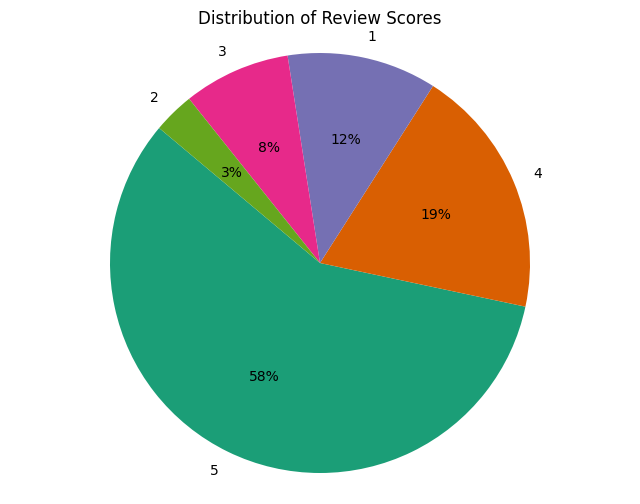

In [ ]:
from matplotlib.pyplot import figure

palet_warna = sns.color_palette('Dark2')

# Menghitung skor review
review_score_counts = order_reviews['review_score'].value_counts().sort_values(ascending=False)

# Membuat pie chart
plt.figure(figsize=(8, 6))
sns.set_palette(palet_warna)
plot = plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%.0f%%', startangle=140)

plt.title('Distribution of Review Scores')
plt.axis('equal')

plt.show()

In [ ]:
# Melihat banyaknya skor review
order_reviews.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

**Insight**
- Berdasarkan data review, kebanyakan customer merasa puas dengan pelayanan toko. Ini ditunjukkan dengan lebih dari 57.076 customer memberikan nilai 5 dari 98.875 total customer (58%).
- Banyaknya rating 1 menempati posisi ketiga dari seluruh rating, dengan 11.393 jumlah rating.


### Melihat Status Order (Apakah order selalu dijalankan?)

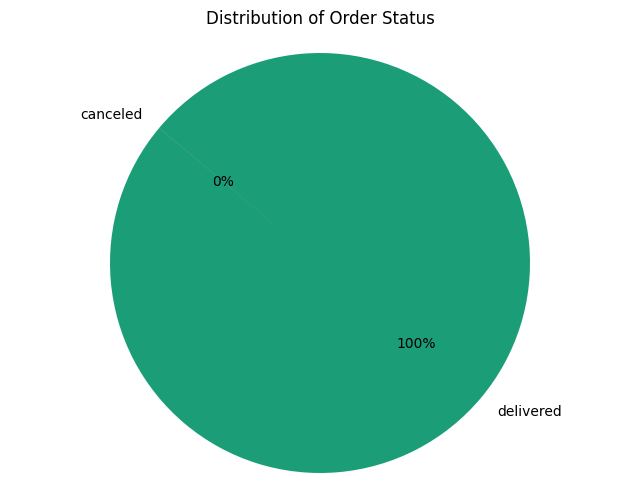

In [ ]:
palet_warna = sns.color_palette('Dark2')

# Menghitung setiap status order
order_stats_counts = df['order_status'].value_counts().sort_values(ascending=False)

# Membuat pie chart
plt.figure(figsize=(8, 6))
sns.set_palette(palet_warna)
plot = plt.pie(order_stats_counts, labels=order_stats_counts.index, autopct='%.0f%%', startangle=140)

plt.title('Distribution of Order Status')
plt.axis('equal')

plt.show()

In [ ]:
# Melihat banyaknya jumlah setiap status order
df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered    95103
canceled         6
Name: order_id, dtype: int64

**Insight**
- Hampir semua order dijalankan dengan baik, dengan jumlah yang telah diantarkan sebanyak 95103 dan hanya 6 order yang dibatalkan.


### Customer di Setiap Kota (Dimanakah kota dan states dengan customer terbanyak?)

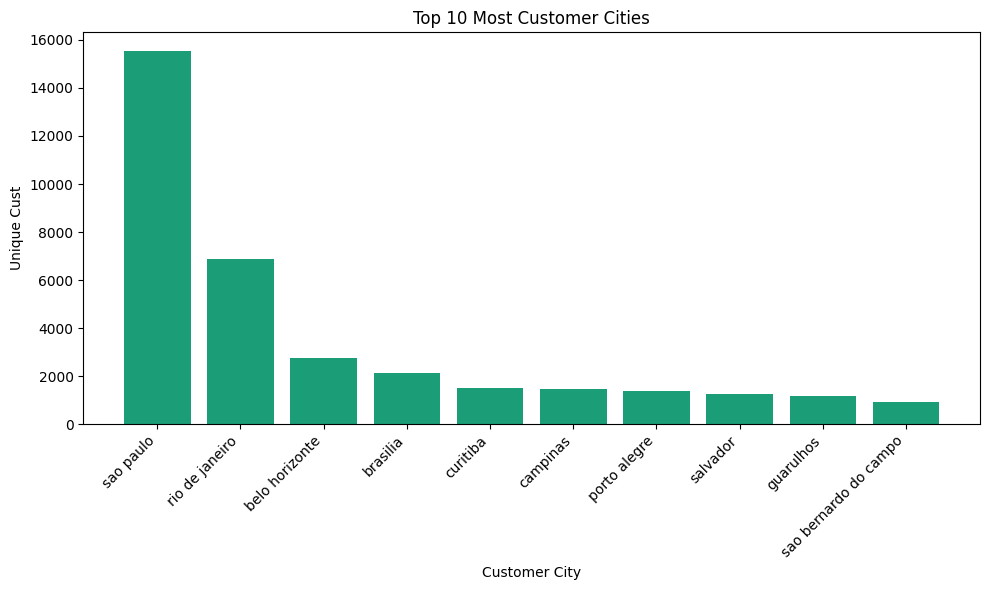

In [ ]:
# Menghitung customer di setiap kota
customer_city= customers.groupby('customer_city')['customer_id'].count().reset_index()

# 10 kota dengan customer terbanyak (asal kota customer)
top_10_cities = customer_city.nlargest(10, 'customer_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['customer_id'])

plt.xlabel('Customer City')
plt.ylabel('Unique Cust')
plt.title('Top 10 Most Customer Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

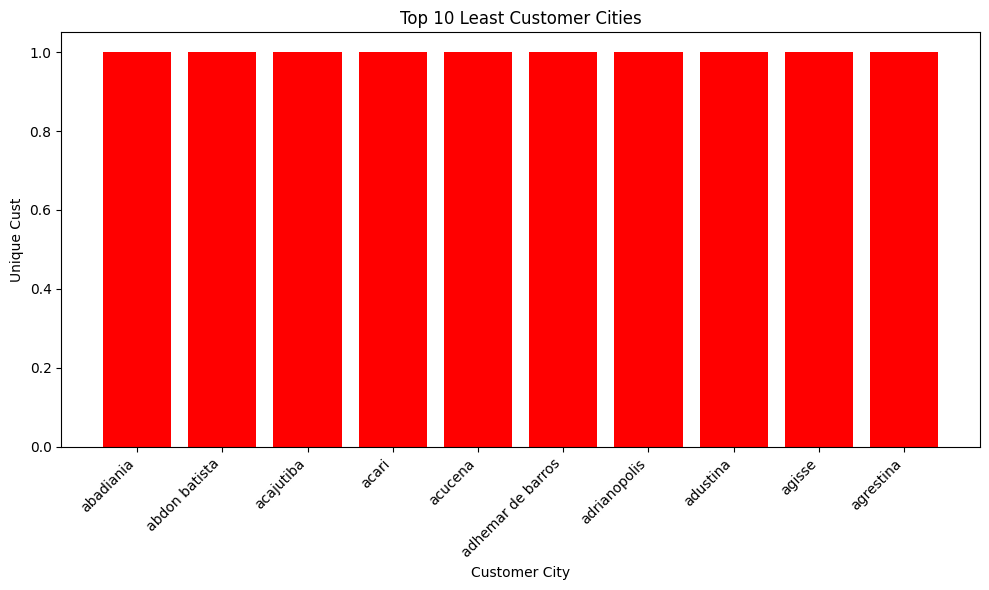

In [ ]:
# 10 kota dengan customer paling sedikit (asal kota customer)
top_10_cities = customer_city.nsmallest(10, 'customer_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['customer_id'], color='red')

plt.xlabel('Customer City')
plt.ylabel('Unique Cust')
plt.title('Top 10 Least Customer Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Kebanyakan customer berasal dari kota Sao Paolo (hampir 16.000 customer). Ini dapat berkaitan dengan status Sao Paulo sebagai kota dengan penduduk terbanyak di Brazil.
- Ada setidaknya 10 kota yang hanya memiliki 1 customer, seperti Abadiania, Acari, Agisse, dll.

### Status Aktif Customer (Berapa banyak customer yang aktif melakukan transaksi?)

In [ ]:
# Membuat list customer_id pada df
customer_id_list = df['customer_id'].tolist()

# Customer aktif jika customer_id berada di df
customers["status"] = np.where(customers["customer_id"].isin(customer_id_list), "Active", "Non Active")

print(customers.sample(5))

                            customer_id                customer_unique_id  \
34747  9d81175f83b45c6a446a8d3dfedd1a25  0245997602d4ec43390590e43dfd39d9   
98065  239d5f9ed5d987b8c323ac8e81641051  4711348768db55c57a67aba080ead566   
17626  572791c601e0c0a2331c6a900425d3f1  446480ca430fd34b345ae78cb641b30b   
19946  e1f402cd293ce51fe9be85bad82bb568  5a5043f11b195195f1455a85de3faf96   
37235  ca9797a749eec5f81c55de42f8d6f176  251a560be0810a220e914f59dce397f5   

       customer_zip_code_prefix customer_city customer_state      status  
34747                      7240     guarulhos             SP      Active  
98065                     29070       vitoria             ES      Active  
17626                      7132     guarulhos             SP      Active  
19946                     12070       taubate             SP  Non Active  
37235                      9911       diadema             SP      Active  


In [ ]:
# Menghitung jumlah customer aktif dan non-aktif
customers.groupby(by="status").customer_id.count()

status
Active        95109
Non Active     4332
Name: customer_id, dtype: int64

**Insight**
- Hampir semua customer pada database e-commerce berstatus aktif, dengan 95.109 berstatus aktif (pernah melakukan pesanan dalam jangka waktu 2016 - 2018) dan 4332 berstatus tidak aktif (tidak melakukan pesanan dalam jangka waktu 2016 - 2018).

### Customer dan Order (Berapa banyak jumlah order yang dilakukan customer?)

<ipython-input-402-12d4906b8840>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')


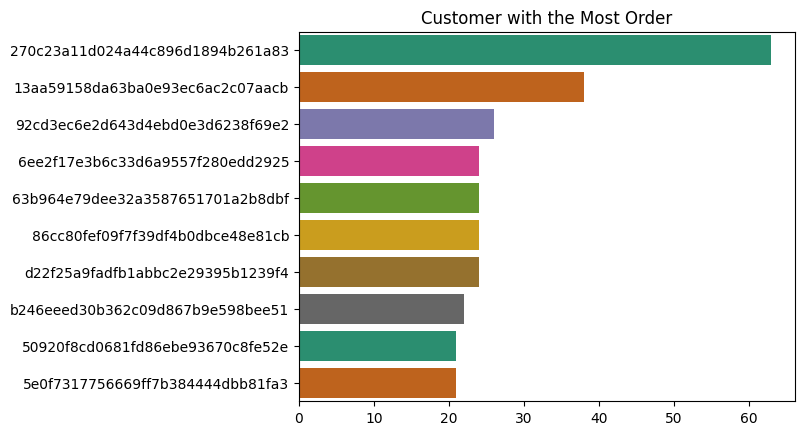

<Figure size 1000x2000 with 0 Axes>

In [ ]:
#Univariate analysis untuk melihat customer yang paling sering order
data_plot  = df['customer_id'].value_counts()[:10].to_list()
label_plot = df['customer_id'].value_counts()[:10].index.to_list()

title = 'Customer with the Most Order'

plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

In [ ]:
# Melihat customer yang paling sering order dengan banyaknya order yang telah dilakukan
df.groupby(by="customer_id").order_id.count().sort_values(ascending=False)[:10]

customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
86cc80fef09f7f39df4b0dbce48e81cb    24
6ee2f17e3b6c33d6a9557f280edd2925    24
d22f25a9fadfb1abbc2e29395b1239f4    24
63b964e79dee32a3587651701a2b8dbf    24
b246eeed30b362c09d867b9e598bee51    22
50920f8cd0681fd86ebe93670c8fe52e    21
fc3d1daec319d62d49bfb5e1f83123e9    21
Name: order_id, dtype: int64

In [ ]:
# Melihat customer yang kurang sering order
df.groupby(by="customer_id").order_id.count().sort_values(ascending=True)[:10]

customer_id
00012a2ce6f8dcda20d059ce98491703    1
a4db1152c2cf540a438b7c91e55f2bdf    1
a4d93ba8bb919c884d30020492717ecb    1
a4d7a2e4682cb484919974235a5c98b2    1
a4d6b3356897a55042079b2be9f115d0    1
a4d344d6eb50f346c8944aee3f04d27d    1
a4d25a8f61e1db5e99771d8268c1e7a6    1
a4d0dd278a425410a8fc24e0d8711a27    1
a4cf14fbb8f3f98e90b586ff7fc19c01    1
a4ce9ac789255d865310ffdf6586c2d2    1
Name: order_id, dtype: int64

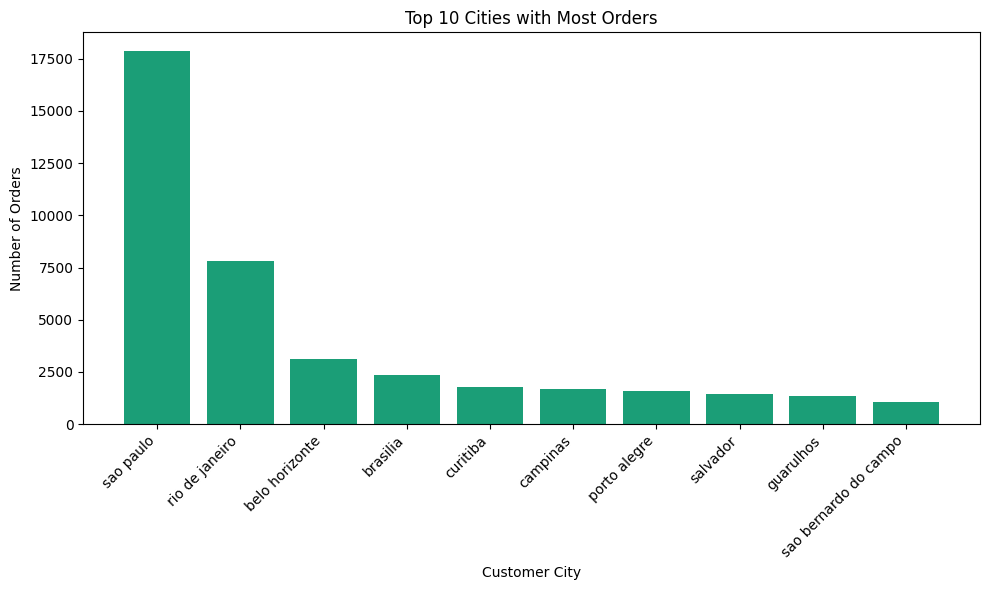

In [ ]:
# Menghitung order customer per kota
customer_city_orders = df.groupby('customer_city')['order_id'].count().reset_index()

# top 10 kota dengan penjualan terbesar
top_10_cities = customer_city_orders.nlargest(10, 'order_id')
# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['order_id'])

plt.xlabel('Customer City')
plt.ylabel('Number of Orders')
plt.title('Top 10 Cities with Most Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

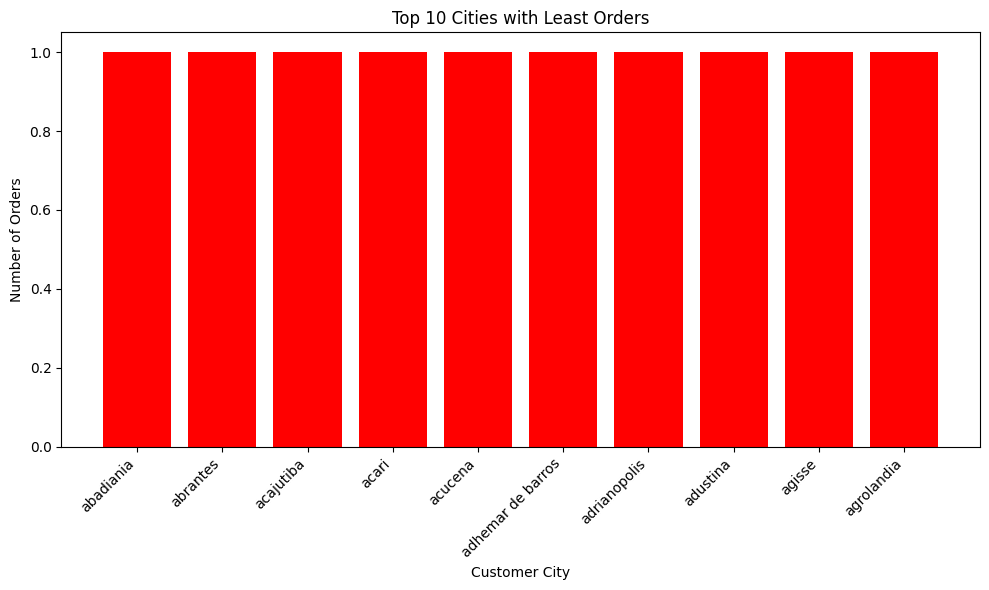

In [ ]:
# top 10 kota dengan penjualan terkecil
top_10_cities_small = customer_city_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities_small['customer_city'], top_10_cities_small['order_id'],color='red')

plt.xlabel('Customer City')
plt.ylabel('Number of Orders')
plt.title('Top 10 Cities with Least Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

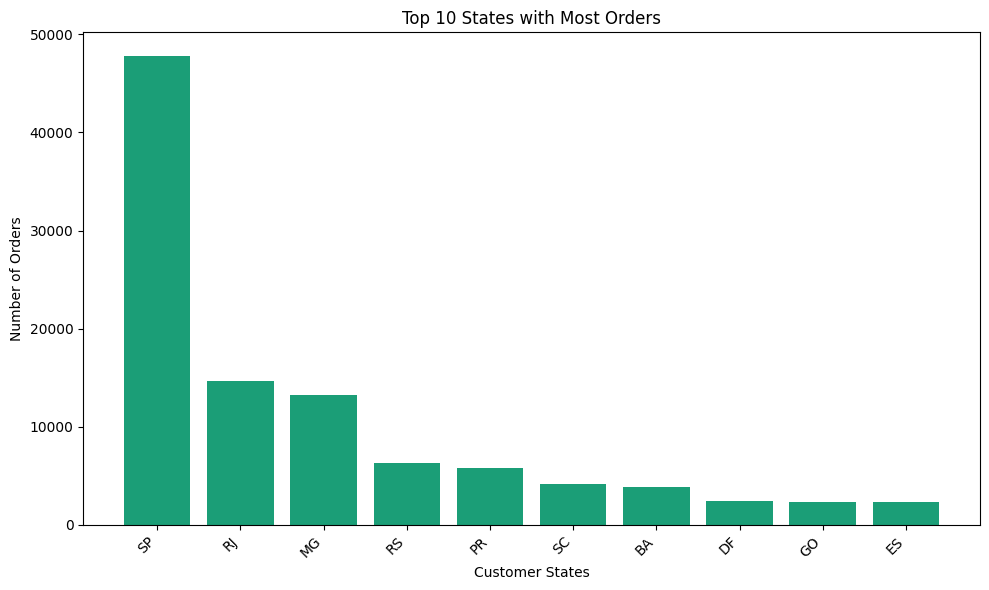

In [ ]:
# Menghitung order customer per state
customer_states_orders = df.groupby('customer_state')['order_id'].count().reset_index()

# top 10 states dengan penjualan terbanyak
top_10_states = customer_states_orders.nlargest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['customer_state'], top_10_states['order_id'])

plt.xlabel('Customer States')
plt.ylabel('Number of Orders')
plt.title('Top 10 States with Most Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

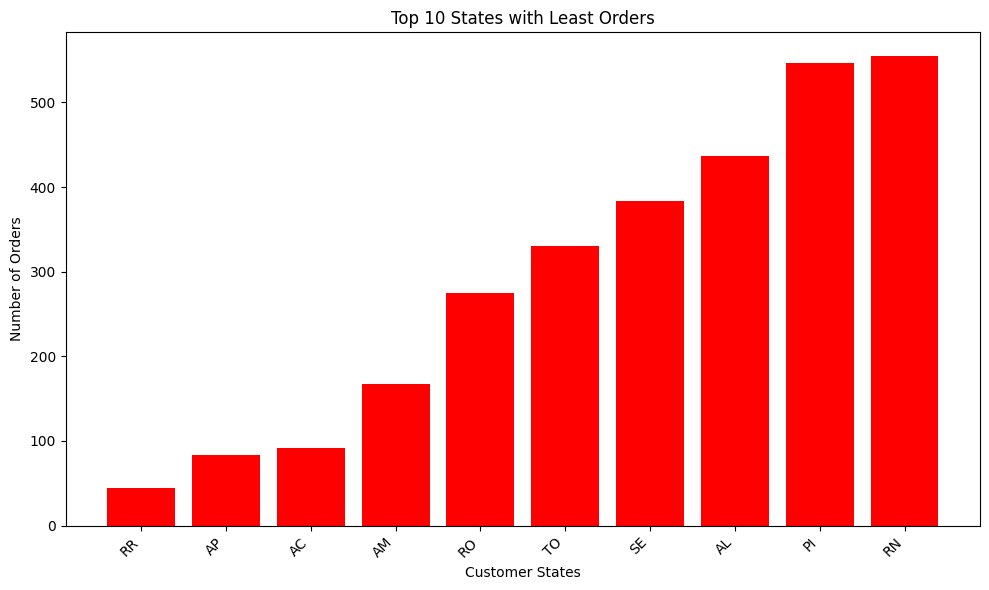

In [ ]:
# Menghitung order customer per state
customer_states_orders = df.groupby('customer_state')['order_id'].count().reset_index()

# top 10 states dengan penjualan terkecil
top_10_states = customer_states_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['customer_state'], top_10_states['order_id'], color='red')

plt.xlabel('Customer States')
plt.ylabel('Number of Orders')
plt.title('Top 10 States with Least Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Diantara seluruh customer, customer dengan id 270c23a11d024a44c896d1894b261a83 paling banyak melakukan transaksi (63 transaksi). Setelah itu, ada setidaknya 9 customer lain yang melakukan lebih dari 20 transaksi dalam periode ini.
- Ada juga setidaknya 10 customer yang hanya melakukan 1 transaksi selama periode ini.
- Ada sekitar 17.500 order yang masuk dari customer di Sao Paulo. Ini merupakan jumlah terbesar diantara kota lain yang jumlah ordernya dibawah 10.000 order pada masing-masing kota.
- Berkaitan dengan minimnya jumlah customer pada kota-kota seperti Abadiania, Acari, dan Agisse, jumlah order pada kota tersebut juga menjadi yang terendah (1 order per kota).
- State SP memegang posisi sebagai state dengan jumlah orderan yang terbanyak, dengan lebih dari 45.000 order diterima. Di state RJ yang menjadi peringkat dua, jumlah orderan ada di kisaran 15.000.
- Dari seluruh state, RR menerima jumlah order paling sedikit dengan kurang dari 100 order.

### Seller di Setiap Kota (Dimanakah kota dengan seller terbanyak?)

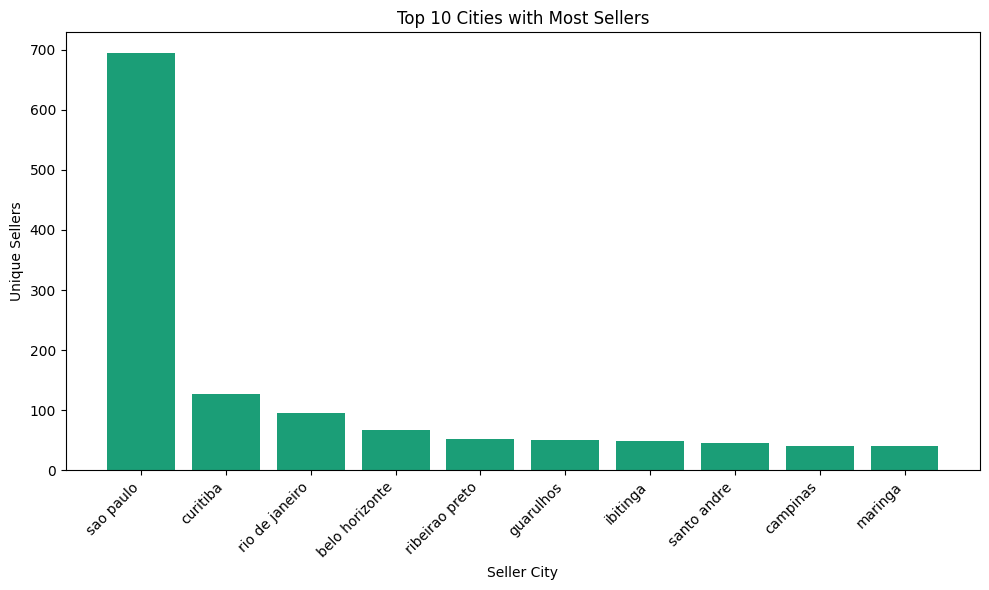

In [ ]:
# Seller di setiap kota
seller_city = sellers.groupby('seller_city')['seller_id'].count().reset_index()

# Kota dengan seller terbanyak (kota asal)
top_10_cities = seller_city.nlargest(10, 'seller_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['seller_id'])

plt.xlabel('Seller City')
plt.ylabel('Unique Sellers')
plt.title('Top 10 Cities with Most Sellers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

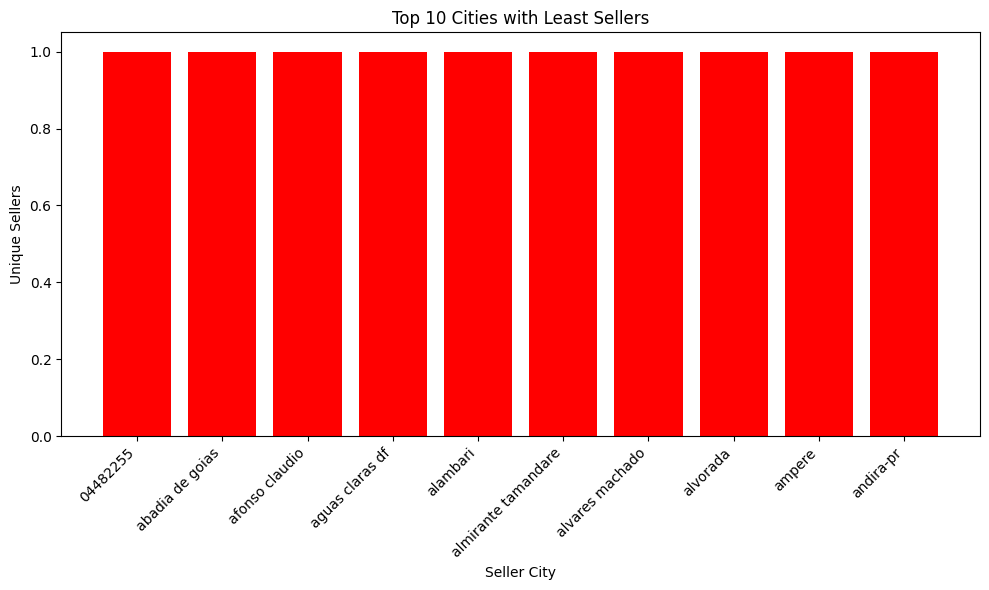

In [ ]:
# Kota dengan seller paling sedikit (kota asal)
top_10_cities = seller_city.nsmallest(10, 'seller_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['seller_id'], color ='red')

plt.xlabel('Seller City')
plt.ylabel('Unique Sellers')
plt.title('Top 10 Cities with Least Sellers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Jumlah seller terbanyak juga berada di kota Sao Paulo dengan sekitar 700 seller.
- Ada beberapa kota yang hanya memiliki 1 seller, seperti kota Abadia de Goias, Alambari, Ampere, dll.

### Seller dan Order (Berapa banyak jumlah order yang diterima seller?)

<ipython-input-411-731f597410a3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')


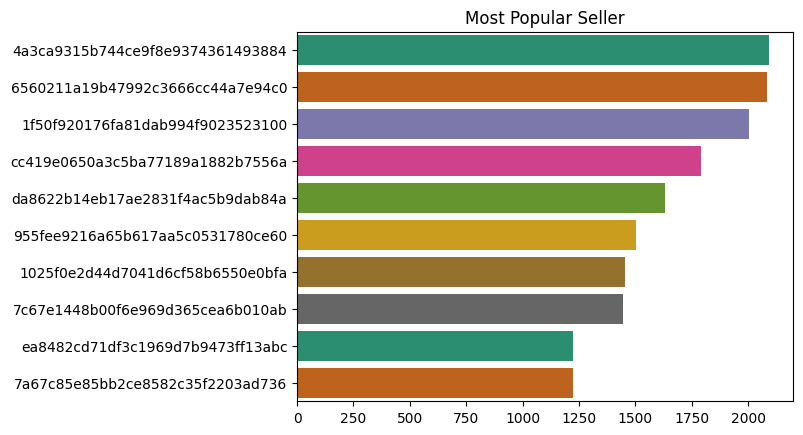

<Figure size 1000x2000 with 0 Axes>

In [ ]:
# Univariate analysis untuk melihat seller paling laris
data_plot  = df['seller_id'].value_counts()[:10].to_list()
label_plot = df['seller_id'].value_counts()[:10].index.to_list()

title = 'Most Popular Seller'

plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

In [ ]:
# Melihat seller yang paling laris dengan banyaknya order yang telah dilayani
df.groupby(by="seller_id").order_id.count().sort_values(ascending=False)

seller_id
4a3ca9315b744ce9f8e9374361493884    2094
6560211a19b47992c3666cc44a7e94c0    2085
1f50f920176fa81dab994f9023523100    2002
cc419e0650a3c5ba77189a1882b7556a    1790
da8622b14eb17ae2831f4ac5b9dab84a    1633
                                    ... 
dbc51f5e45d654ecc16cb68e6817ecea       1
5415337f1863452476d42d9f14a16a61       1
2c9005d8043aff18b8557ffb7b13cda4       1
db7ed69a53aa9fb1c01930ba54a88bbe       1
499185655c29ecfdbfe776ef7cf875b5       1
Name: order_id, Length: 2912, dtype: int64

**Insight**
- Seller dengan id 4a3ca9315b744ce9f8e9374361493884 merupakan seller paling populer dengan jumlah orderan yang diterima sebanyak 2094 order.
- Ada beberapa seller yang kurang populer dengan jumlah order hanya 1 kali, seperti seller dengan id 499185655c29ecfdbfe776ef7cf875b5.

### Performa Penjualan dan Revenue dalam Beberapa Bulan Terakhir

In [ ]:
# Mengambil bulan dan tahun dari tanggal saat order di approve
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['YearMonth'] = df['order_approved_at'].dt.to_period('M')

# Jumlah order dan pemasukan per bulan
monthly_orders_df = df.groupby(by="YearMonth").agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df

order_count     revenue
YearMonth                         
2016-10            268    42230.08
2016-12              1       10.90
2017-01            704   111545.68
2017-02           1592   237664.10
2017-03           2502   371307.40
2017-04           2215   347772.06
2017-05           3469   518524.01
2017-06           3090   440400.57
2017-07           3781   506315.60
2017-08           4154   574887.49
2017-09           4108   626934.61
2017-10           4391   663804.17
2017-11           7051   992819.58
2017-12           5543   758365.76
2018-01           6825   931681.85
2018-02           6429   840076.06
2018-03           6963   988472.62
2018-04           6574   976912.43
2018-05           6903  1029731.39
2018-06           6073   901058.60
2018-07           6001   872836.67
2018-08           6472   888948.03

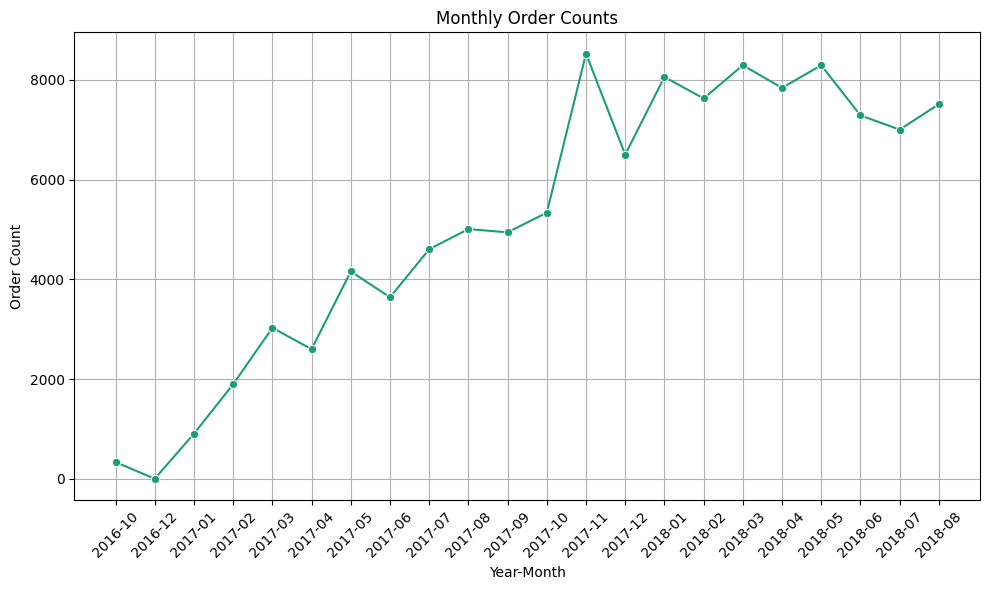

In [ ]:
# Mengelompokkan dan menghitung order berdasarkan tanggal dan bulan
monthly_counts = df.groupby('YearMonth')['order_id'].count()

# Membuat line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.title('Monthly Order Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

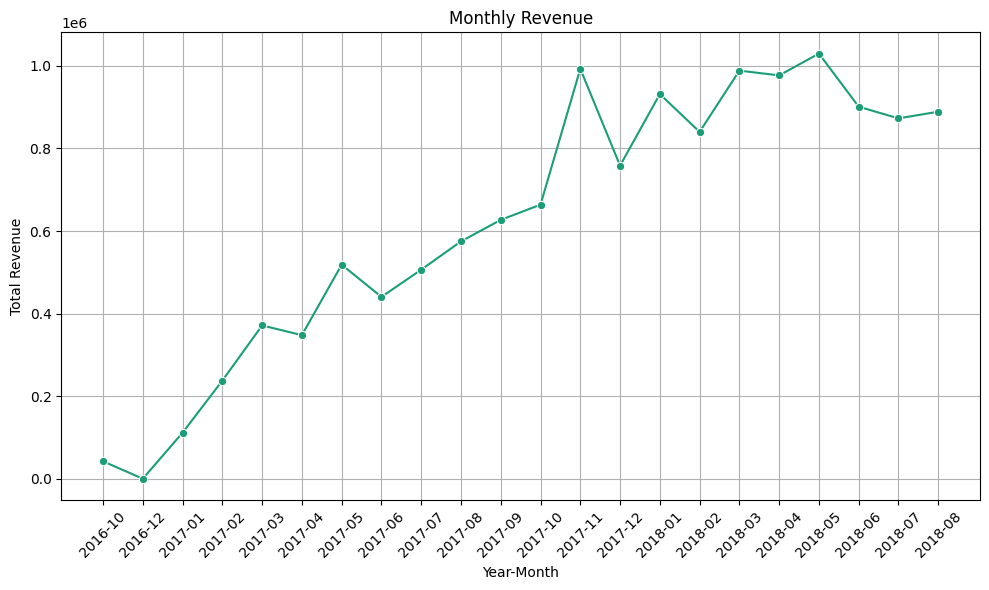

In [ ]:
# Mengelompokkan dan menghitung revenue order berdasarkan tanggal dan bulan
monthly_counts = df.groupby('YearMonth')['price'].sum()

# Membuat line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Jumlah order terbanyak dalam sebulan yang diterima pada periode ini adalah sebanyak 7051 order, yaitu pada bulan November 2017.
- Sedangkan order paling sedikit dalam satu bulan terjadi pada bulan Desember 2016 dengan 1 order saja.
- Mengenai revenue yang didapatkan, bulan Mei 2018 merupakan bulan dengan pendapatan tertinggi dengan jumlah US$1,029,731.39.

- Berhubungan dengan jumlah ordernya yang sedikit, bulan Desember 2016 juga menjadi bulan dengan pendapatan terendah di US$10.90.


### Produk dan Penjualan (Produk apa yang paling banyak dan paling sedikit terjual?)

#### Per Produk

In [ ]:
# Menghitung order dari setiap produk
product_orders = df.groupby('product_id')['order_id'].count().reset_index()

In [ ]:
# Melihat produk yang terlaris
df.groupby(by="product_id").order_id.count().sort_values(ascending=False)[:10]

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    529
99a4788cb24856965c36a24e339b6058    513
422879e10f46682990de24d770e7f83d    505
389d119b48cf3043d311335e499d9c6b    403
368c6c730842d78016ad823897a372db    395
53759a2ecddad2bb87a079a1f1519f73    389
d1c427060a0f73f6b889a5c7c61f2ac4    346
53b36df67ebb7c41585e8d54d6772e08    325
3dd2a17168ec895c781a9191c1e95ad7    276
154e7e31ebfa092203795c972e5804a6    276
Name: order_id, dtype: int64

In [ ]:
# Melihat produk yang kurang laris
df.groupby(by="product_id").order_id.count().sort_values(ascending=True)[:10]

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
8f8e98cf133d4ab9a74486c3ce81da02    1
8f8e77fd044480226cd55c1ebb9df34a    1
8f8c372264024a67ef0c7b449241e65f    1
8f8ba9033e26050d48ea1e8807e8cc8e    1
8f87e8e0a393ebf8373a52dc1b27c5fc    1
8f840e793958e7522d3421524b07ee4b    1
8f79800a347de2da5104a414bc791a0b    1
8f73a652972eef397960af15ad4ddc10    1
8f73613d06e3a557da0249015cbae6b6    1
Name: order_id, dtype: int64

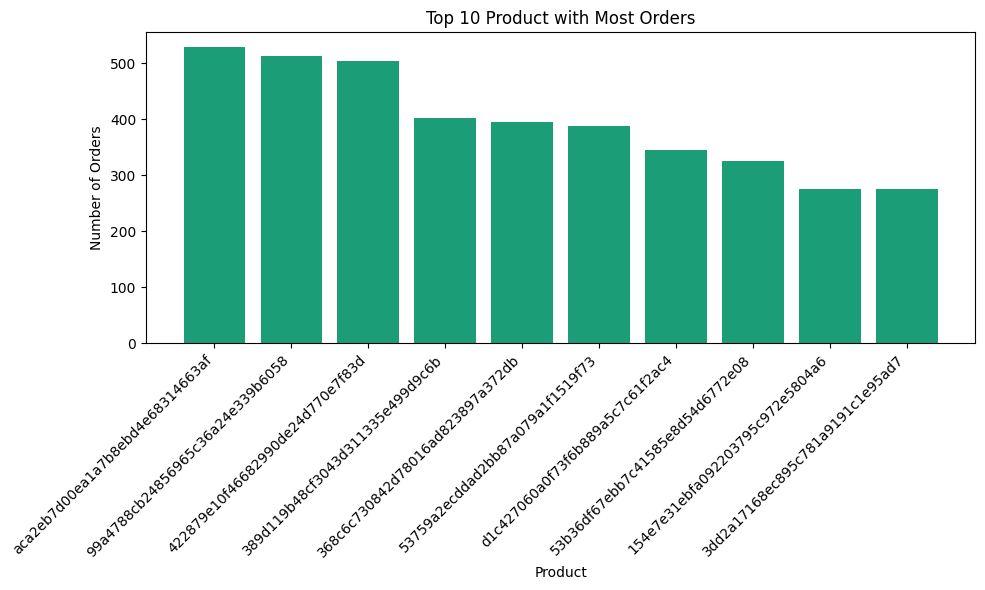

In [ ]:
# 10 produk terlaris
top_10_product = product_orders.nlargest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['order_id'])

plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.title('Top 10 Product with Most Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

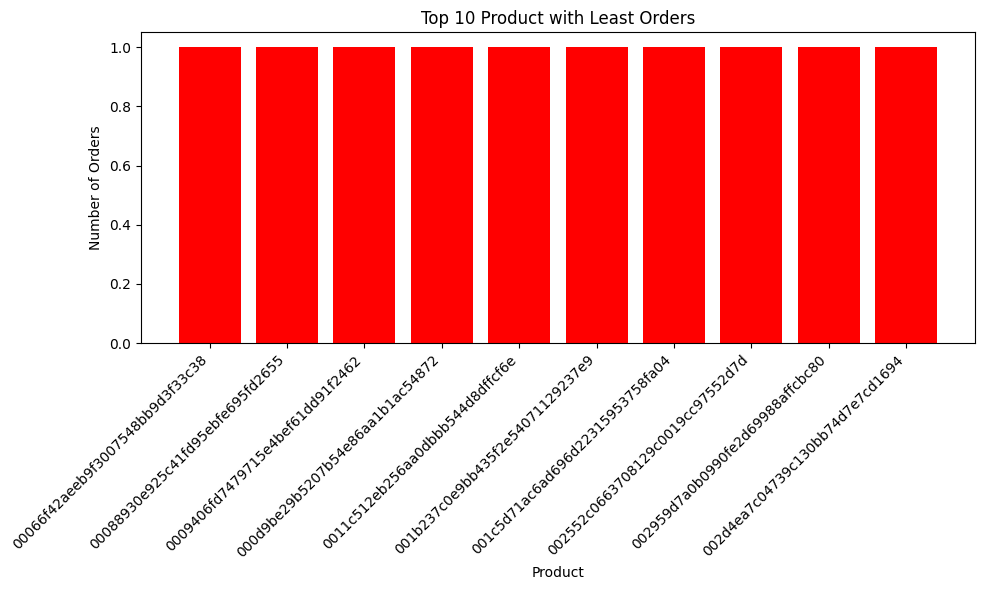

In [ ]:
# 10 produk kurang laris
top_10_product = product_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['order_id'], color='red')

plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.title('Top 10 Product with Least Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Melihat produk yang paling menguntungkan
df.groupby(by="product_id").price.sum().sort_values(ascending=False)[:10]

product_id
bb50f2e236e5eea0100680137654686c    68160.00
6cdd53843498f92890544667809f1595    54702.00
d6160fb7873f184099d9bc95e30376af    53998.84
d1c427060a0f73f6b889a5c7c61f2ac4    47547.45
99a4788cb24856965c36a24e339b6058    45243.16
25c38557cf793876c5abdd5931f922db    44829.32
3dd2a17168ec895c781a9191c1e95ad7    41382.40
53b36df67ebb7c41585e8d54d6772e08    37929.42
aca2eb7d00ea1a7b8ebd4e68314663af    37743.60
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
Name: price, dtype: float64

In [ ]:
# Melihat produk yang paling tidak menguntungkan
df.groupby(by="product_id").price.sum().sort_values(ascending=True)[:10]

product_id
310dc32058903b6416c71faff132df9e    2.29
8a3254bee785a526d548a81a9bc3c9be    2.55
680cc8535be7cc69544238c1d6a83fe8    2.90
2e8316b31db34314f393806fd7b6e185    2.99
eee2fb3dceb9ffd8a99dd4bc4b7e860a    3.90
836c4b48c2b383bb38bb5788f828c596    3.90
66389c9df136a25c8f131757ce3a6967    3.99
46fce52cef5caa7cc225a5531c946c8b    4.40
da86f3242cb55a55dd9cd7b19d951685    4.50
9cf02957cdf023b6b8dfebede6c64755    5.31
Name: price, dtype: float64

In [ ]:
# Menghitung banyaknya pendapatan order per produk
product_orders = df.groupby('product_id')['price'].sum().reset_index()

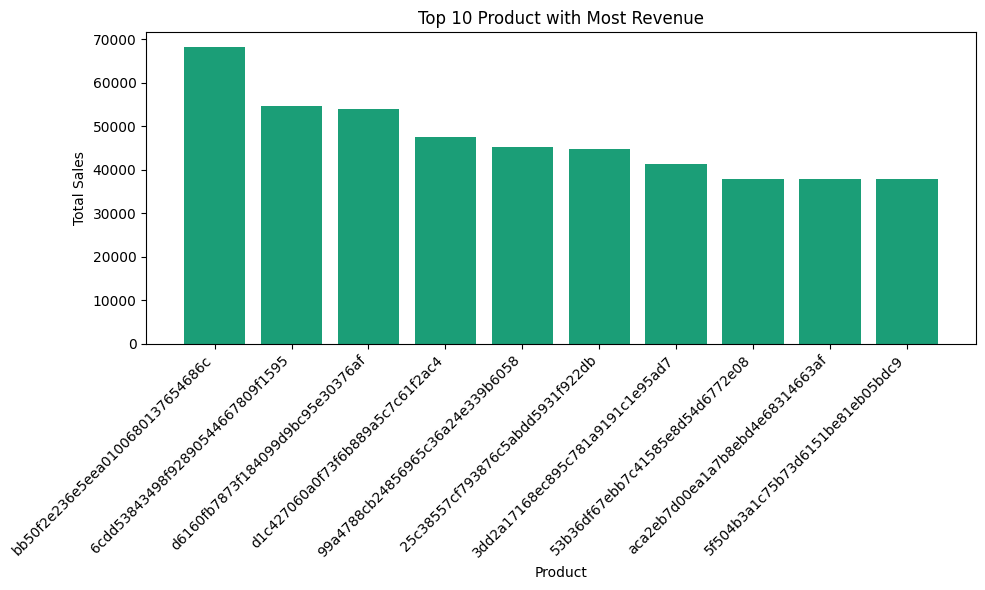

In [ ]:
# 10 produk terlaris
top_10_product = product_orders.nlargest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['price'])

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Product with Most Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

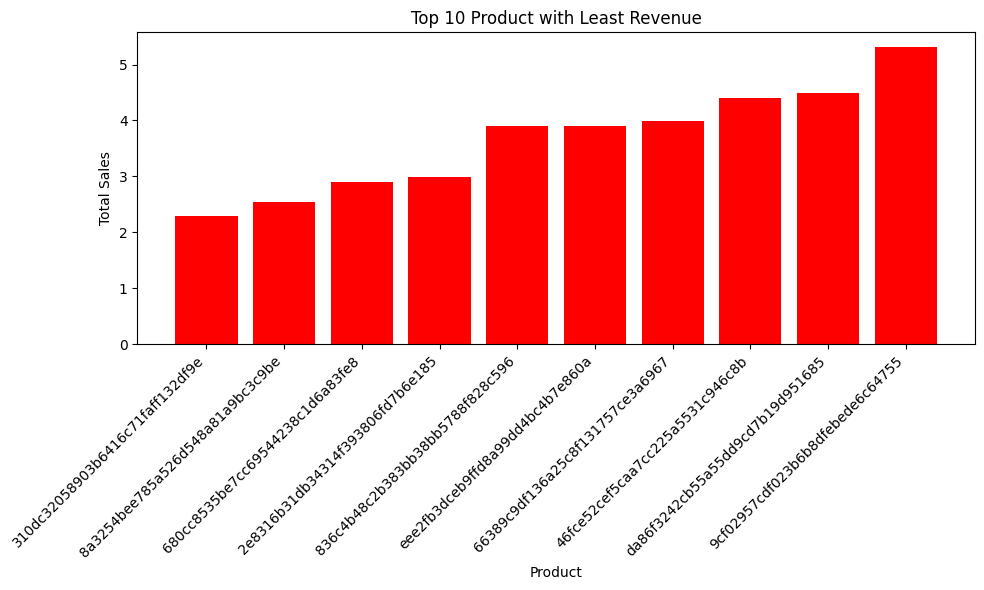

In [ ]:
# 10 produk kurang laris
top_10_product = product_orders.nsmallest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['price'], color='red')

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Product with Least Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Produk dengan id aca2eb7d00ea1a7b8ebd4e68314663af merupakan produk terpopuler dengan 529 order.
- Ada setidaknya 10 produk yang kurang laris dengan hanya 1 barang terjual seperti produk dengan id 00066f42aeeb9f3007548bb9d3f33c38.
- Produk yang menghasilkan revenue terbanyak adalah produk dengan id bb50f2e236e5eea0100680137654686c dengan pemasukan sebesar US$68,160.00.

- Ada beberapa produk yang kurang menghasilkan keuntungan seperti produk dengan id 310dc32058903b6416c71faff132df9e dengan pemasukan hanya US$2.29.


#### Per Kategori

In [ ]:
# Melihat kategori produk yang paling laris
df.groupby(by="product_category_name").order_id.count().sort_values(ascending=False)[:10]

product_category_name
bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: order_id, dtype: int64

In [ ]:
# Melihat kategori produk yang paling tidak laris
df.groupby(by="product_category_name").order_id.count().sort_values(ascending=True)[:10]

product_category_name
security_and_services                 2
fashion_childrens_clothes             7
cds_dvds_musicals                    14
la_cuisine                           16
arts_and_craftmanship                24
fashion_sport                        29
home_comfort_2                       31
flowers                              33
diapers_and_hygiene                  37
furniture_mattress_and_upholstery    40
Name: order_id, dtype: int64

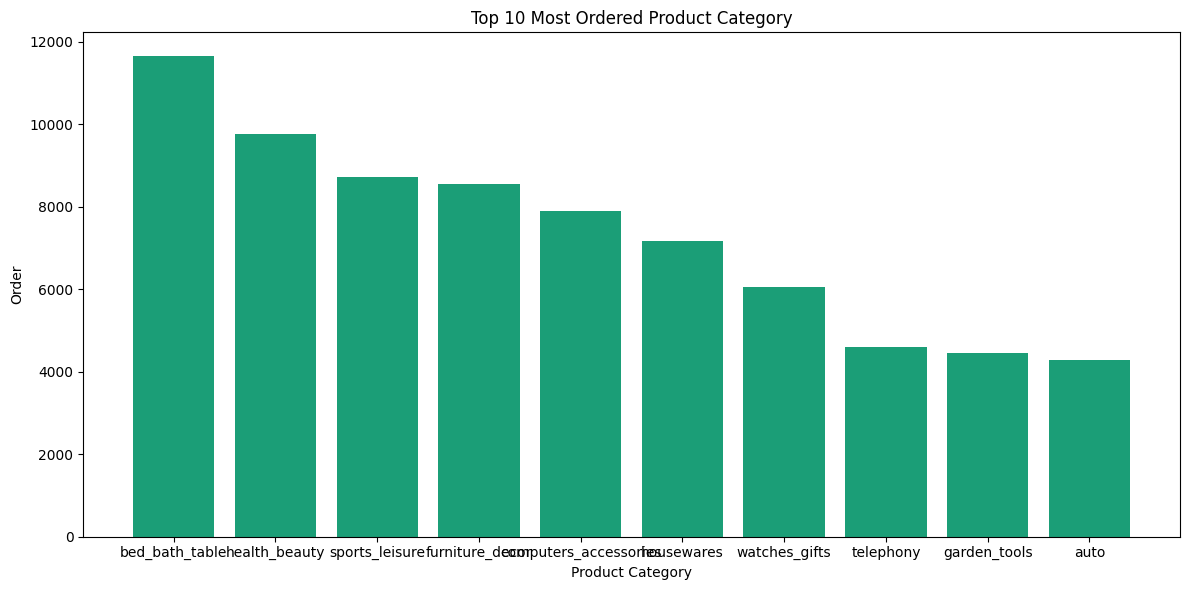

In [ ]:
# Menghitung banyaknya order per kategori produk
product_cat_orders = df.groupby('product_category_name')['order_id'].count().reset_index()

# Mendapatkan top 10 kategori produk
top_10_products_cat = product_cat_orders.nlargest(10, 'order_id')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['order_id'])

plt.xlabel('Product Category')
plt.ylabel('Order')
plt.title('Top 10 Most Ordered Product Category')

plt.tight_layout()
plt.show()

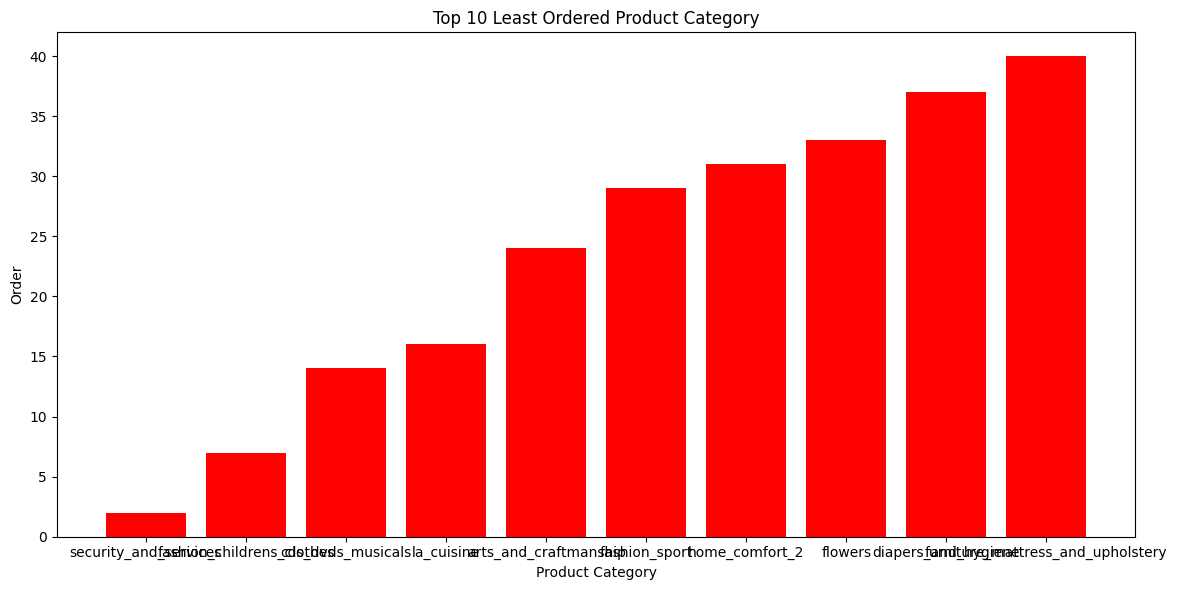

In [ ]:
# Mendapatkan top 10 kategori produk kurang laris
top_10_products_cat = product_cat_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['order_id'], color='red')

plt.xlabel('Product Category')
plt.ylabel('Order')
plt.title('Top 10 Least Ordered Product Category')

plt.tight_layout()
plt.show()

In [ ]:
# Melihat produk yang paling menguntungkan
df.groupby(by="product_category_name").price.sum().sort_values(ascending=False)[:10]

product_category_name
health_beauty            1271413.18
watches_gifts            1213162.80
bed_bath_table           1077834.14
sports_leisure            990417.74
computers_accessories     918837.87
furniture_decor           745748.80
housewares                648187.74
cool_stuff                634163.78
auto                      602881.75
garden_tools              492255.08
Name: price, dtype: float64

In [ ]:
# Melihat produk yang paling tidak menguntungkan
df.groupby(by="product_category_name").price.sum().sort_values(ascending=True)[:10]

product_category_name
security_and_services         283.29
fashion_childrens_clothes     519.95
cds_dvds_musicals             730.00
home_comfort_2                773.17
flowers                      1110.04
diapers_and_hygiene          1500.79
arts_and_craftmanship        1814.01
fashion_sport                2094.52
la_cuisine                   2303.98
fashio_female_clothing       2634.94
Name: price, dtype: float64

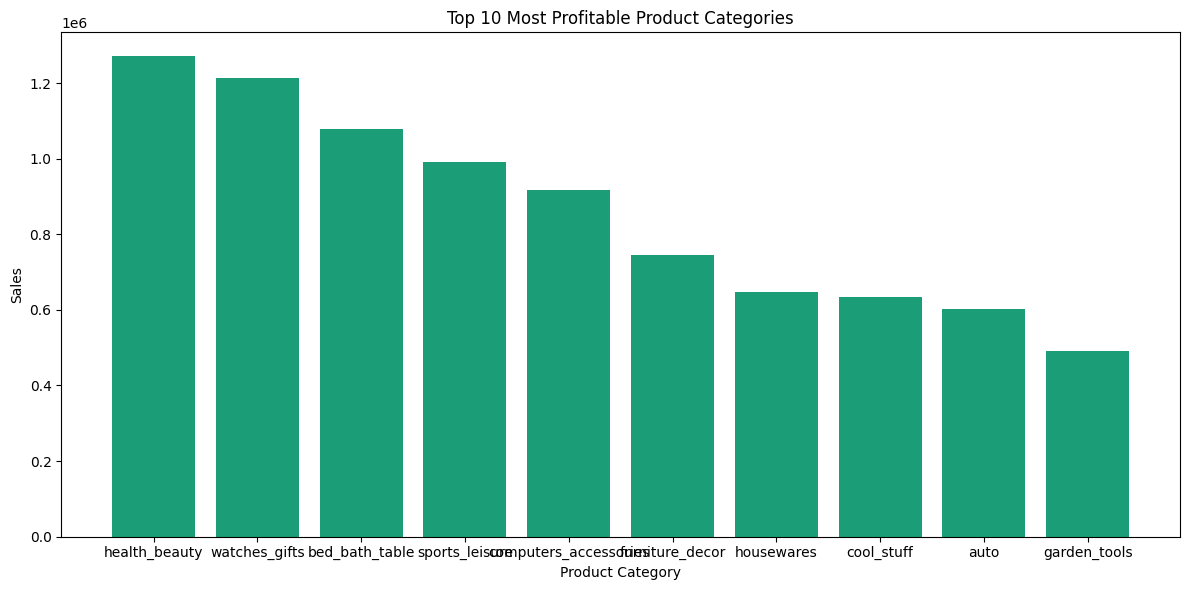

In [ ]:
# Menghitung banyaknya pendapatan order per kategori produk
product_cat_orders = df.groupby('product_category_name')['price'].sum().reset_index()

# Mendapatkan top 10 kategori produk
top_10_products_cat = product_cat_orders.nlargest(10, 'price')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['price'])

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top 10 Most Profitable Product Categories')

plt.tight_layout()
plt.show()

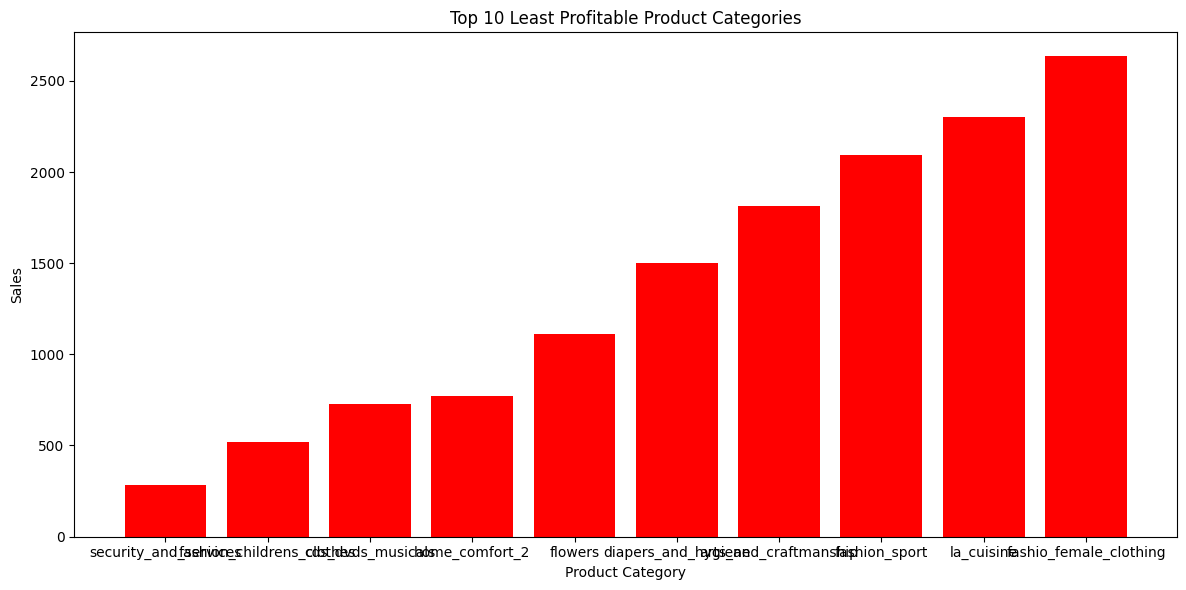

In [ ]:
# Mendapatkan top 10 kategori produk kurang menguntungkan
top_10_products_cat = product_cat_orders.nsmallest(10, 'price')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['price'], color='red')

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top 10 Least Profitable Product Categories')

plt.tight_layout()
plt.show()

**Insight**
- Produk kategori bed_bath_table adalah yang paling diminati customer, terlihat dari jumlah ordernya yang paling tinggi di 11.649 order.
- Produk kategori bed_bath_security_and_services adalah yang paling kurang diminati customer, terlihat dari jumlah ordernya yang hanya 2 order.
- Dari sisi revenue, kategori health_beauty memegang posisi pendapatan tertinggi sebesar US$1,271,413.18.

- Sedangkan untuk kategori yang memiliki pemasukan paling kecil, security_and_services hanya mendapatkan US$283.29. Ini selaras dengan jumlah ordernya yang terkecil.

### Penjualan Setiap Kota (Bagaimana performa penjualan di setiap kota?)

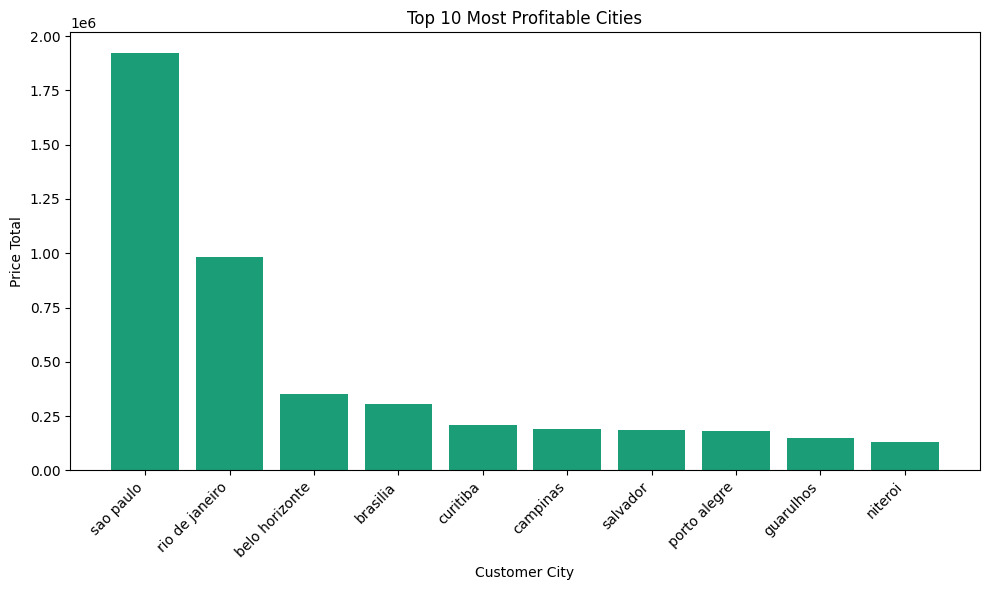

In [ ]:
# Menghitung pemasukan setiap kota
customer_city_profit = df.groupby('customer_city')['price'].sum().reset_index()

# 10 kota dengan pendapatan terbesar
top_10_cities = customer_city_profit.nlargest(10, 'price')  # Select top 10 rows based on 'order_id'

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['price'])

plt.xlabel('Customer City')
plt.ylabel('Price Total')
plt.title('Top 10 Most Profitable Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

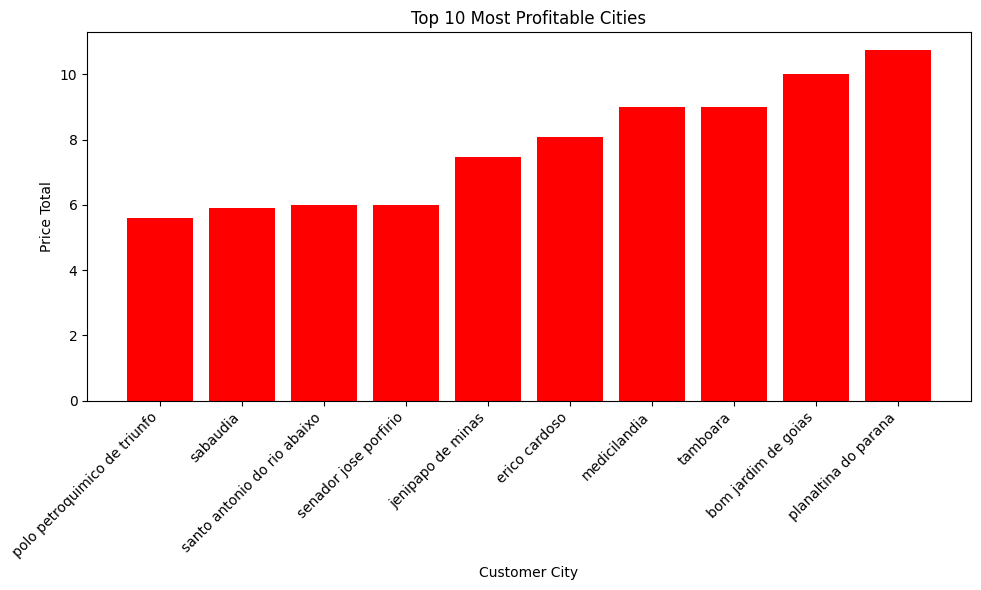

In [ ]:
# Kota dengan penjualan paling sedikit
top_10_cities = customer_city_profit.nsmallest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['price'], color='red')

plt.xlabel('Customer City')
plt.ylabel('Price Total')
plt.title('Top 10 Most Profitable Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Kota dengan pemasukan terbesar berada di Sao Paulo. Ini dapat berhubungan dengan jumlah customer dan seller yang juga paling banyak di kota ini. Pendapatan di kota ini adalah hampir sekitar US$2 juta.

- Kota dengan pendapatan paling kecil berada di kota Polo Petroquimico de Triunfo dengan pendapatan kurang dari US$6.

### Penjualan Kategori Produk per State (Bagaimana performa penjualan di setiap state?)

In [ ]:
df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id": "count",
    "price": "sum"
})

order_id    price
customer_state product_category_name                    
AC             auto                           5   606.97
               baby                           3   697.84
               bed_bath_table                 4   567.70
               books_general_interest         2   633.80
               christmas_supplies             1    69.90
...                                         ...      ...
TO             sports_leisure                26  5533.32
               stationery                     3   276.80
               telephony                     21  1268.12
               toys                          13  1864.15
               watches_gifts                 29  4920.89

[1351 rows x 2 columns]

### Pembayaran (Bagaimana behaviour customer dalam melakukan pembayaran?)

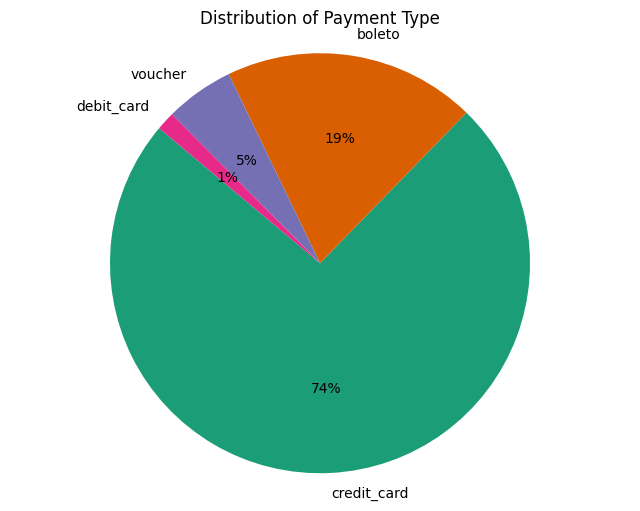

In [ ]:
palet_warna = sns.color_palette('Dark2')

# Menghitung banyaknya order per tipe pembayaran
pymnt_type_counts = df['payment_type'].value_counts().sort_values(ascending=False)  # Sort by frequency (descending)

plt.figure(figsize=(8, 6))
sns.set_palette(palet_warna)
plot = plt.pie(pymnt_type_counts, labels=pymnt_type_counts.index, autopct='%.0f%%', startangle=140)

plt.title('Distribution of Payment Type')
plt.axis('equal')

plt.show()

<ipython-input-441-b987720ffa17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'Dark2')


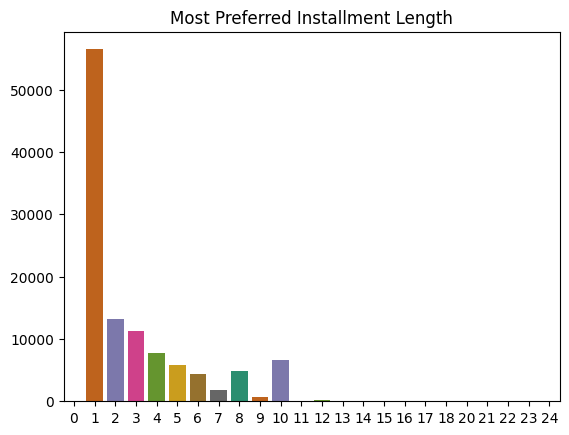

<Figure size 1000x2000 with 0 Axes>

In [ ]:
#Univariate analysis untuk melihat lama cicilan yang sering dipilih
data_plot  = df['payment_installments'].value_counts().to_list()
label_plot = df['payment_installments'].value_counts().index.to_list()

title = 'Most Preferred Installment Length'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

In [ ]:
# Menghitung rata-rata lama cicilan tersingkat per kategori produk
avg_payment_per_category = df.groupby('product_category_name')['payment_installments'].mean().sort_values(ascending=True)[:10].reset_index()
print(avg_payment_per_category)

       product_category_name  payment_installments
0      security_and_services              1.000000
1                    flowers              1.363636
2             home_comfort_2              1.451613
3      arts_and_craftmanship              1.750000
4                electronics              1.783399
5                     drinks              1.809264
6            home_appliances              1.949416
7  fashion_childrens_clothes              2.000000
8               dvds_blu_ray              2.000000
9                        art              2.004831


In [ ]:
# Menghitung rata-rata lama cicilan terlama per kategori produk
avg_payment_per_category = df.groupby('product_category_name')['payment_installments'].mean().sort_values(ascending=False)[:10].reset_index()
print(avg_payment_per_category)

                   product_category_name  payment_installments
0                              computers              5.967593
1  small_appliances_home_oven_and_coffee              5.506667
2                             la_cuisine              4.250000
3                      home_appliances_2              4.038314
4                  furniture_living_room              4.028846
5                           home_confort              4.000000
6                 fashio_female_clothing              3.955556
7                       office_furniture              3.836281
8                          watches_gifts              3.665017
9        construction_tools_construction              3.656716


**Insight**
- Kebanyakan customer (74%) lebih senang melakukan pembayaran dengan credit card.
- Hanya 1% customer melakukan pembayaran melalui debit card.
- Kebanyakan transaksi memiliki lama installment 1 bulan untuk pembayaran.
- Kategori produk computers memiliki rata-rata installment terlama, dengan lama sekitar 6 bulan.

### Korelasi Berat Produk dengan Harga Pengiriman

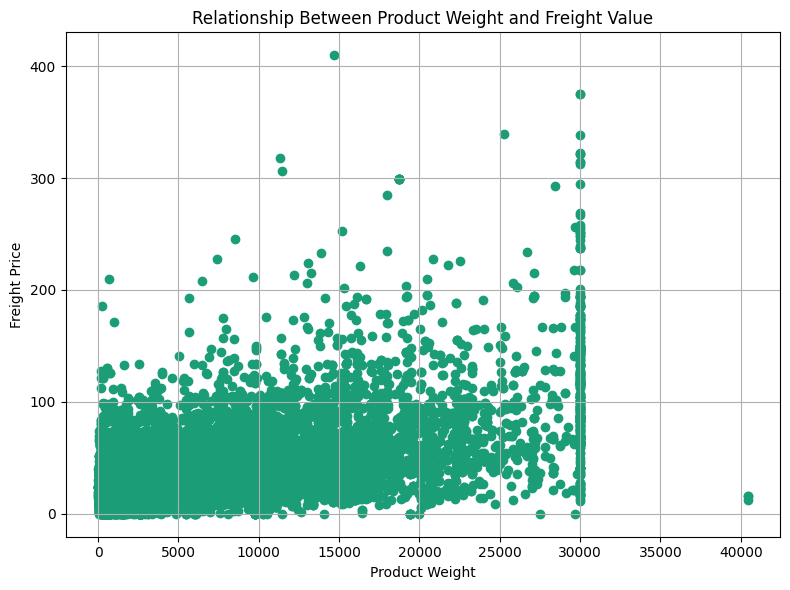

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['product_weight_g'], df['freight_value'])

plt.xlabel('Product Weight')
plt.ylabel('Freight Price')
plt.title('Relationship Between Product Weight and Freight Value')

plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Tidak ada korelasi signifikan antara berat produk dengan harga pengiriman.


### Waktu Penerimaan Order dan Pengiriman (Berapa lama respon seller dan ekspedisi dalam memproses order?)

#### Mengubah tanggal yang tidak tepat

In [ ]:
# Menukar tanggal approval order dan pembelian jika tanggal approve sebelum tanggal pembelian
temp = df['order_purchase_timestamp'].copy()
temp2 = df['order_approved_at'].copy()
df.loc[df['order_approved_at'] < df['order_purchase_timestamp'], 'order_purchase_timestamp'] = temp2
df.loc[df['order_approved_at'] == df['order_purchase_timestamp'], 'order_approved_at'] = temp

In [ ]:
# Menukar tanggal pengantaran kurir dan pengantaran ke customer jika tanggal pengantaran ke customer sebelum tanggal pengantaran ke kurir
temp = df['order_delivered_carrier_date'].copy()
temp2 = df['order_delivered_customer_date'].copy()
df.loc[df['order_delivered_customer_date'] < df['order_delivered_carrier_date'], 'order_delivered_carrier_date'] = temp2
df.loc[df['order_delivered_customer_date'] == df['order_delivered_carrier_date'], 'order_delivered_customer_date'] = temp

#### Rata-rata Waktu Approval Order

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Lama waktu konfirmasi dihitung dari selisih waktu pembelian dan approval
df['confirm_time'] = df['order_approved_at'] - df['order_purchase_timestamp']

# Menghitung rata-rata waktu approval order
average_confirm_time = df.groupby('seller_id')['confirm_time'].mean()

print(average_confirm_time.dt.days.to_string(name='Average Confirmation Time (days)'))

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    0
001cca7ae9ae17fb1caed9dfb1094831    0
002100f778ceb8431b7a1020ff7ab48f    1
004c9cd9d87a3c30c522c48c4fc07416    0
00720abe85ba0859807595bbf045a33b    0
00ab3eff1b5192e5f1a63bcecfee11c8    0
00d8b143d12632bad99c0ad66ad52825    0
00ee68308b45bc5e2660cd833c3f81cc    0
00fc707aaaad2d31347cf883cd2dfe10    0
010543a62bd80aa422851e79a3bc7540    0
010da0602d7774602cd1b3f5fb7b709e    1
011b0eaba87386a2ae96a7d32bb531d1    1
01266d4c46afa519678d16a8b683d325    0
013900e863eace745d3ec7614cab5b1a    0
014c0679dd340a0e338872e7ec85666a    0
014d9a685fd57276679edd00e07089e5    0
0176f73cc1195f367f7b32db1e5b3aa8    0
01bcc9d254a0143f0ce9791b960b2a47    0
01c97ebb5cdac52891c0ed1c37ba0012    0
01cf7e3d21494c41fb86034f2e714fa1    0
01ed254b9ff8407dfb9d99ba1e17d923    0
01fd077212124329bac32490e8ef80d9    0
01fdefa7697d26ad920e9e0346d4bd1b    0
0241d4d5d36f10f80c644447315af0bd    0
0249d282d911d23cb8b869ab49c99f53    0
024b564ae893ce8e9bfa02c10a401ece    1
02

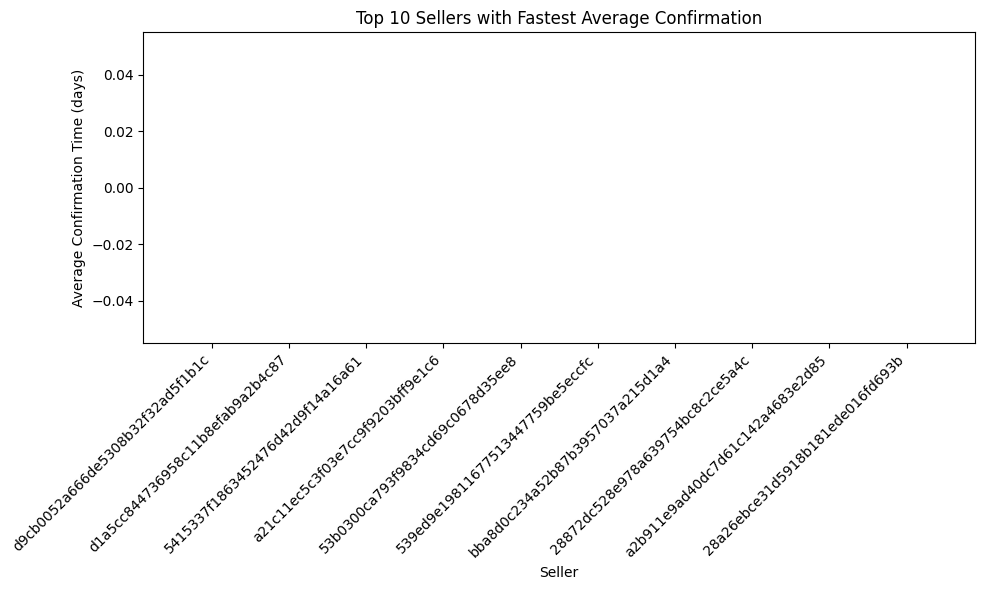

In [ ]:
# Seller paling cepat approve order
top_10_fastest_seller = average_confirm_time.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_fastest_seller.index, top_10_fastest_seller.dt.days)

plt.xlabel('Seller')
plt.ylabel('Average Confirmation Time (days)')
plt.title('Top 10 Sellers with Fastest Average Confirmation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

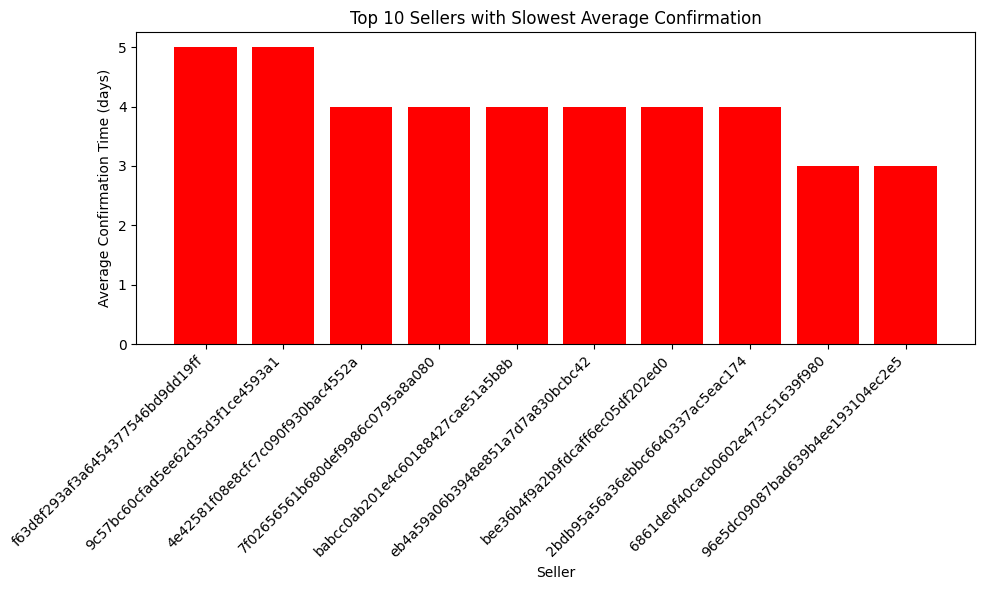

In [ ]:
# Seller paling lama approve order
top_10_slowest_seller = average_confirm_time.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_slowest_seller.index, top_10_slowest_seller.dt.days, color='red')

plt.xlabel('Seller')
plt.ylabel('Average Confirmation Time (days)')
plt.title('Top 10 Sellers with Slowest Average Confirmation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Ada beberapa seller yang memiliki respon cepat dalam mengkonfirmasi order, seperti seller dengan id d9cb0052a666de5308b32f32ad5f1b1c yang membutuhkan waktu kurang dari 1 hari untuk mengkonfirmasi order.
- Ada juga beberapa seller yang membutuhkan waktu cukup lama untuk mengkonfirmasi order, seperti seller dengan id f63d8f293af3a6454377546bd9dd19ff yang membutuhkan waktu 5 hari.


#### Jarak Waktu Approved sampai dibawa ke Ekspedisi

In [ ]:
# Menukar tanggal pengantaran kurir dan pengantaran ke customer jika tanggal pengantaran ke customer sebelum tanggal pengantaran ke kurir
temp = df['order_approved_at'].copy()
temp2 = df['order_delivered_carrier_date'].copy()
df.loc[df['order_delivered_carrier_date'] < df['order_approved_at'], 'order_approved_at'] = temp2
df.loc[df['order_delivered_carrier_date'] == df['order_approved_at'], 'order_delivered_carrier_date'] = temp

In [ ]:
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# Lama waktu menunggu dihitung dari selisih waktu approval dan pengantaran ke kurir
df['waiting_time'] = df['order_delivered_carrier_date'] - df['order_approved_at']

# # Menghitung rata-rata waktu pengantaran order ke ekspedisi
average_waiting_time = df.groupby('seller_id')['waiting_time'].mean()

print(average_waiting_time.dt.days.to_string(name='Average Waiting Time (days)'))

<ipython-input-453-b134d1fc5f4b>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
<ipython-input-453-b134d1fc5f4b>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
<ipython-input-453-b134d1fc5f4b>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.da

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     3
001cca7ae9ae17fb1caed9dfb1094831     2
002100f778ceb8431b7a1020ff7ab48f     3
004c9cd9d87a3c30c522c48c4fc07416     1
00720abe85ba0859807595bbf045a33b     2
00ab3eff1b5192e5f1a63bcecfee11c8     4
00d8b143d12632bad99c0ad66ad52825     2
00ee68308b45bc5e2660cd833c3f81cc     1
00fc707aaaad2d31347cf883cd2dfe10     2
010543a62bd80aa422851e79a3bc7540     3
010da0602d7774602cd1b3f5fb7b709e    21
011b0eaba87386a2ae96a7d32bb531d1    14
01266d4c46afa519678d16a8b683d325     0
013900e863eace745d3ec7614cab5b1a     2
014c0679dd340a0e338872e7ec85666a     5
014d9a685fd57276679edd00e07089e5     2
0176f73cc1195f367f7b32db1e5b3aa8     1
01bcc9d254a0143f0ce9791b960b2a47     0
01c97ebb5cdac52891c0ed1c37ba0012     0
01cf7e3d21494c41fb86034f2e714fa1     2
01ed254b9ff8407dfb9d99ba1e17d923     1
01fd077212124329bac32490e8ef80d9     0
01fdefa7697d26ad920e9e0346d4bd1b     1
0241d4d5d36f10f80c644447315af0bd     1
0249d282d911d23cb8b869ab49c99f53     3
024b564ae893ce8

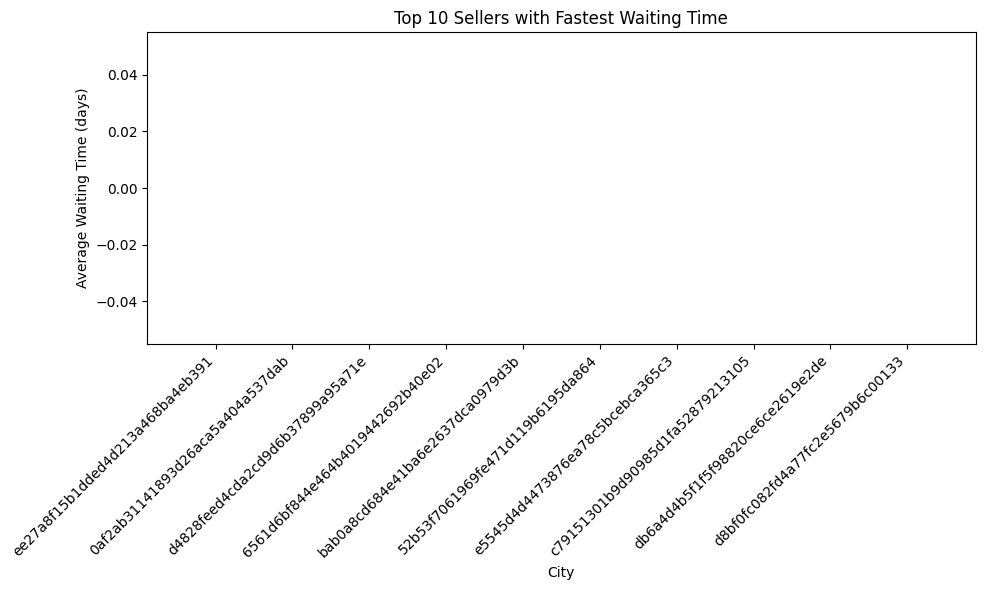

In [ ]:
# Seller tercepat dalam melakukan pengiriman
top_10_fastest_waiting = average_waiting_time.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_fastest_waiting.index, top_10_fastest_waiting.dt.days)

plt.xlabel('City')
plt.ylabel('Average Waiting Time (days)')
plt.title('Top 10 Sellers with Fastest Waiting Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

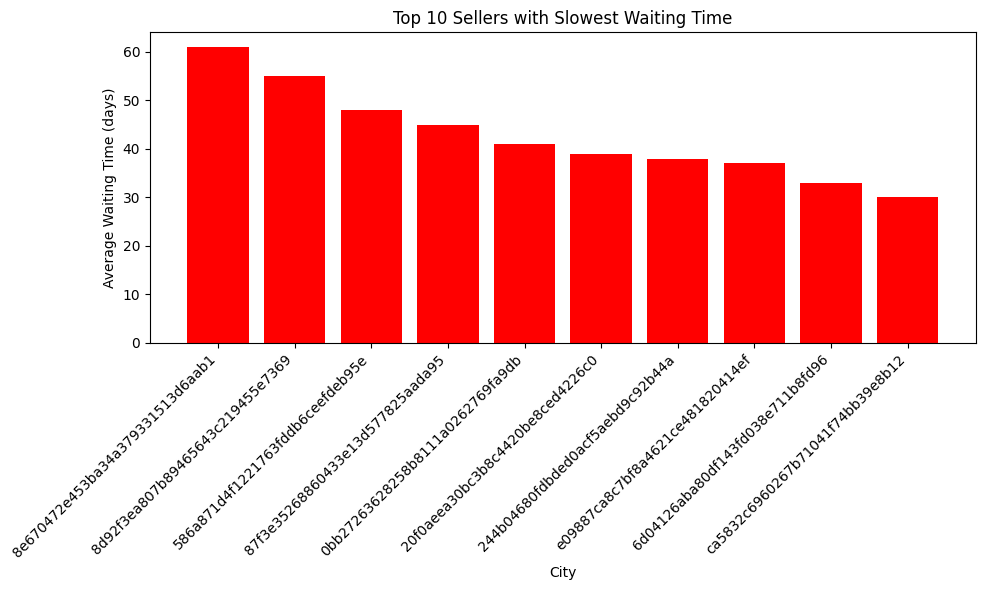

In [ ]:
# Seller terlama dalam mengirim barang
top_10_slowest_waiting = average_waiting_time.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_slowest_waiting.index, top_10_slowest_waiting.dt.days, color='red')

plt.xlabel('City')
plt.ylabel('Average Waiting Time (days)')
plt.title('Top 10 Sellers with Slowest Waiting Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Beberapa seller memiliki jarak waktu singkat untuk mengirimkan barang dari tanggal approval, seperti seller dengan id ee27a8f15b1dded4d213a468ba4eb391 yang waktu tunggunyaa tidak sampai satu hari.
- Sedangkan beberapa seller lain seperti seller dengan id 8e670472e453ba34a379331513d6aab1, membutuhkan waktu yang cukup lama (60 hari) untuk mengirimkan barang setelah order dikonfirmasi.

#### Rata-rata Waktu Pengantaran per Kota

In [ ]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Waktu pengantaran dihitung dari selisih tanggal drop barang ke kurir hingga pengantaran ke customer
df['shipping_time'] = df['order_delivered_customer_date'] - df['order_delivered_carrier_date']

# Menghitung rata-rata waktu pengiriman ke setiap kota
average_shipping_time_per_city = df.groupby('customer_city')['shipping_time'].mean()

print(average_shipping_time_per_city.dt.days.to_string(name='Average Shipping Time (days)'))

customer_city
abadia dos dourados                   9
abadiania                            21
abaete                                8
abaetetuba                           22
abaiara                              32
abaira                               12
abare                                14
abatia                               15
abdon batista                         9
abelardo luz                         15
abrantes                             15
abre campo                            8
abreu e lima                         12
acaiaca                               8
acailandia                           14
acajutiba                            16
acarau                               30
acari                                11
acegua                               21
acopiara                             18
acreuna                              11
acu                                  18
acucena                               4
adamantina                            8
adhemar de barros         

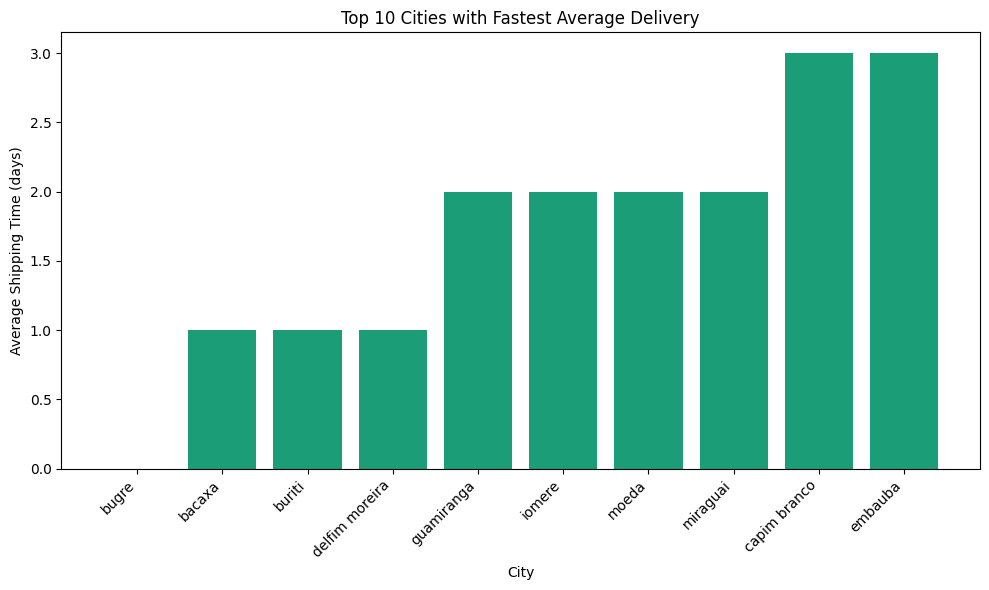

In [ ]:
# Kota dengan rata-rata pengiriman tercepat
top_10_cities = average_shipping_time_per_city.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities.index, top_10_cities.dt.days)

plt.xlabel('City')
plt.ylabel('Average Shipping Time (days)')
plt.title('Top 10 Cities with Fastest Average Delivery')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

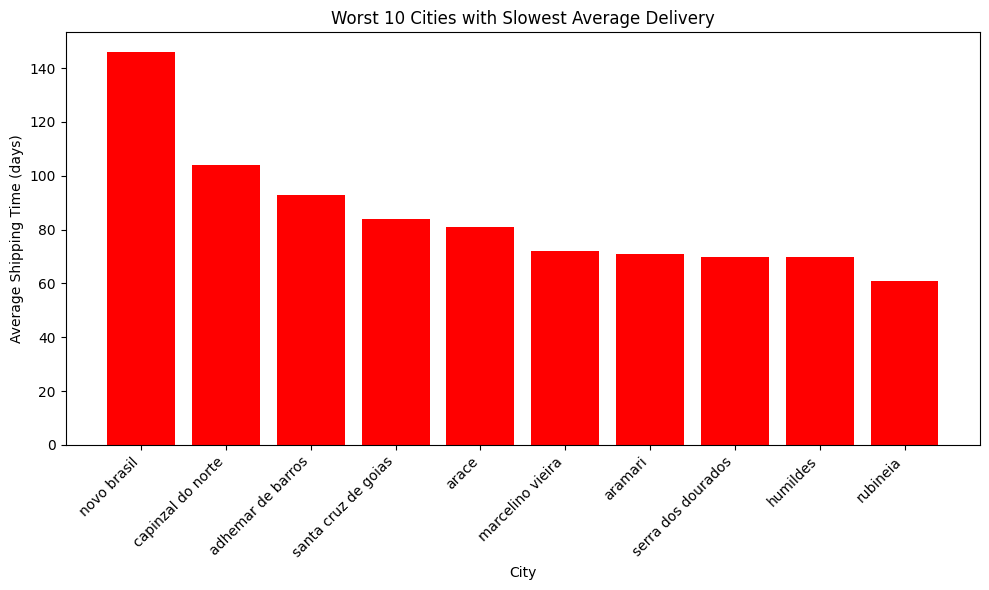

In [ ]:
# Kota dengan pengiriman terlama
worst_10_cities = average_shipping_time_per_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(worst_10_cities.index, worst_10_cities.dt.days, color='red')

plt.xlabel('City')
plt.ylabel('Average Shipping Time (days)')
plt.title('Worst 10 Cities with Slowest Average Delivery')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Ada beberapa kota yang ekspedisinya cepat melakukan pengiriman ke customer, seperti kota Bugre, Bacaxa, Iomere, dan Embauba yang membutuhkan waktu sekitar 0-3 hari.
- Sedangkan untuk kota yang ekspedisinya lama melakukan pengiriman ke customer, ada kota Novo Brasil, Capinzal do Norte, Arace, dll yang membutuhkan waktu sekitar 60-140 hari.

### Jarak Waktu Balasan Review (Berapa lama respon seller dalam membalas review?)

In [ ]:
review_df = df.merge(order_reviews, on='order_id')

In [ ]:
# Menukar tanggal balas review dan penulisan review jika tanggal balasan sebelum tanggal penulisan
temp = review_df['review_creation_date'].copy()
temp2 = review_df['review_answer_timestamp'].copy()
review_df.loc[review_df['review_creation_date'] < review_df['review_answer_timestamp'], 'review_answer_timestamp'] = temp2
review_df.loc[review_df['review_creation_date'] == review_df['review_answer_timestamp'], 'review_creation_date'] = temp

In [ ]:
review_df['review_answer_timestamp'] = pd.to_datetime(review_df['review_answer_timestamp'])
review_df['review_creation_date'] = pd.to_datetime(review_df['review_creation_date'])

# Waktu pengantaran dihitung dari selisih tanggal drop barang ke kurir hingga pengantaran ke customer
review_df['review_reply_time'] = review_df['review_answer_timestamp'] - review_df['review_creation_date']

# Menghitung rata-rata waktu balasan review setiap seller
average_answer_time_per_seller = review_df.groupby('seller_id')['review_reply_time'].mean()

print(average_answer_time_per_seller.dt.days.to_string(name='Average Review Answer Time (days)'))

seller_id
0015a82c2db000af6aaaf3ae2ecb0532      1
001cca7ae9ae17fb1caed9dfb1094831      2
002100f778ceb8431b7a1020ff7ab48f      1
004c9cd9d87a3c30c522c48c4fc07416      2
00720abe85ba0859807595bbf045a33b      0
00ab3eff1b5192e5f1a63bcecfee11c8      1
00d8b143d12632bad99c0ad66ad52825      0
00ee68308b45bc5e2660cd833c3f81cc      1
00fc707aaaad2d31347cf883cd2dfe10      1
010543a62bd80aa422851e79a3bc7540      1
010da0602d7774602cd1b3f5fb7b709e      1
011b0eaba87386a2ae96a7d32bb531d1     77
01266d4c46afa519678d16a8b683d325      2
013900e863eace745d3ec7614cab5b1a      1
014c0679dd340a0e338872e7ec85666a      1
014d9a685fd57276679edd00e07089e5      1
0176f73cc1195f367f7b32db1e5b3aa8      1
01bcc9d254a0143f0ce9791b960b2a47      0
01c97ebb5cdac52891c0ed1c37ba0012      1
01cf7e3d21494c41fb86034f2e714fa1      1
01ed254b9ff8407dfb9d99ba1e17d923      2
01fd077212124329bac32490e8ef80d9      1
01fdefa7697d26ad920e9e0346d4bd1b      5
0241d4d5d36f10f80c644447315af0bd      2
0249d282d911d23cb8b869ab49c99f

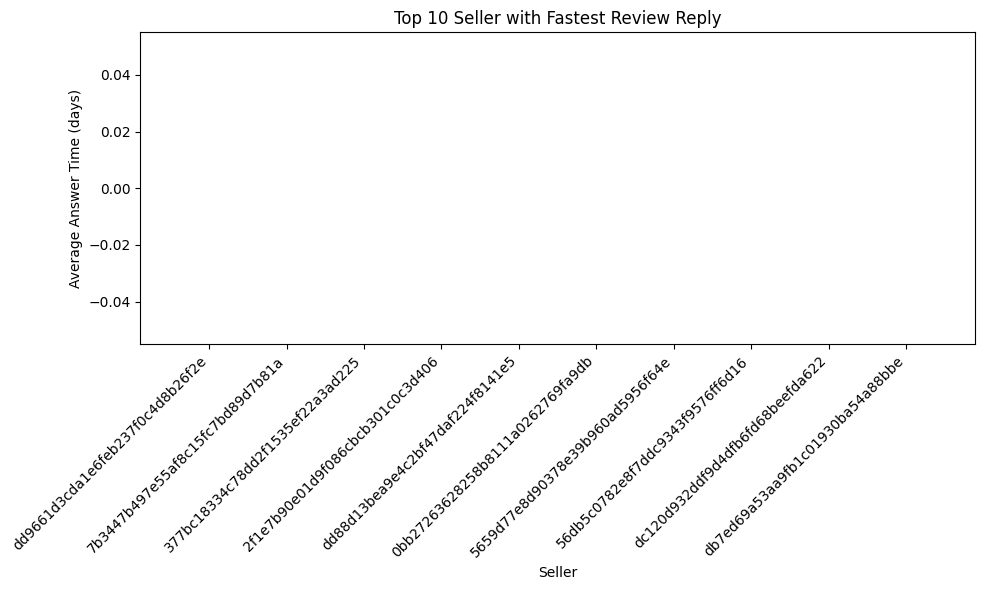

In [ ]:
# Seller dengan rata-rata jawaban tercepat
top_10_answer = average_answer_time_per_seller.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_answer.index, top_10_answer.dt.days)

plt.xlabel('Seller')
plt.ylabel('Average Answer Time (days)')
plt.title('Top 10 Seller with Fastest Review Reply')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

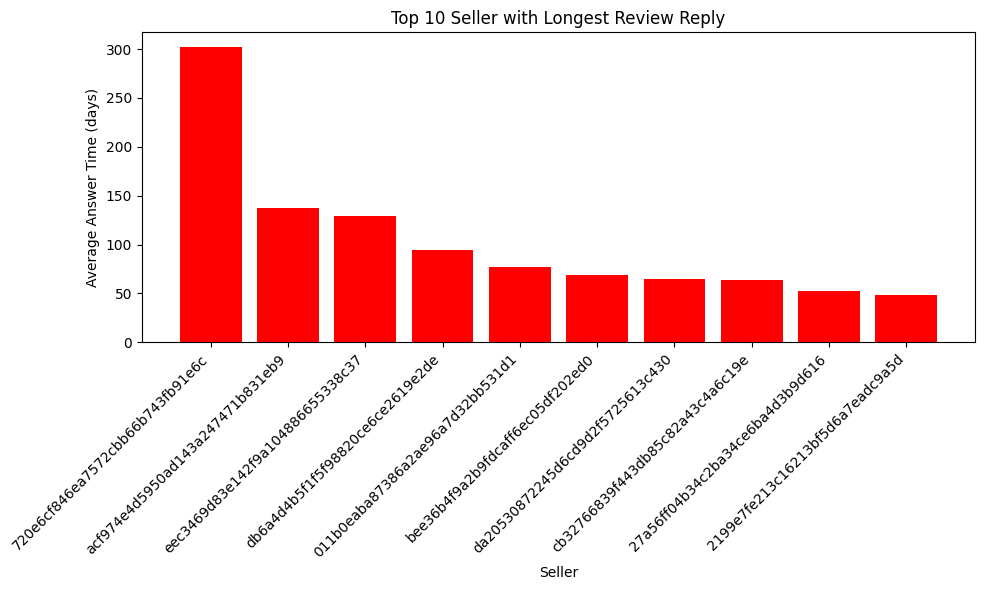

In [ ]:
# Seller dengan rata-rata jawaban terlama
top_10_answer = average_answer_time_per_seller.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_answer.index, top_10_answer.dt.days, color='red')

plt.xlabel('Seller')
plt.ylabel('Average Answer Time (days)')
plt.title('Top 10 Seller with Longest Review Reply')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**
- Ada beberapa seller yang membutuhkan waktu kurang dari satu hari untuk membalas review dari customer, seperti seller dengan id dd9661d3cda1e6feb237f0c4d8b26f2e.
- Beberapa seller membutuhkan waktu yang cukup lama untuk membalas review dari customer, seperti seller dengn id 720e6cf846ea7572cbb66b743fb91e6c yang membutuhkan waktu 300 hari untuk melakukannya.

### RFM Analysis

Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [ ]:
rfm_df = df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

customer_id  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703          1     89.80      288
1  000161a058600d5901f007fab4c27140          1     54.90      409
2  0001fd6190edaaf884bcaf3d49edf079          1    179.99      547
3  0002414f95344307404f0ace7a26f1d5          1    149.90      377
4  000379cdec625522490c315e70c7a9fb          1     93.00      147

In [ ]:
avg_recency = round(rfm_df.recency.mean(), 1)
print("Rata-rata recency: ", avg_recency)

Rata-rata recency:  238.4


In [ ]:
avg_frequency = round(rfm_df.frequency.mean(), 2)
print("Rata-rata frequency: ", avg_frequency)

Rata-rata frequency:  1.0


In [ ]:
avg_monetary = rfm_df.monetary.mean()
print("Rata-rata monetary: ", avg_monetary)

Rata-rata monetary:  143.22829238032153


<ipython-input-468-fbdb2ab73231>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[0])
<ipython-input-468-fbdb2ab73231>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[1])


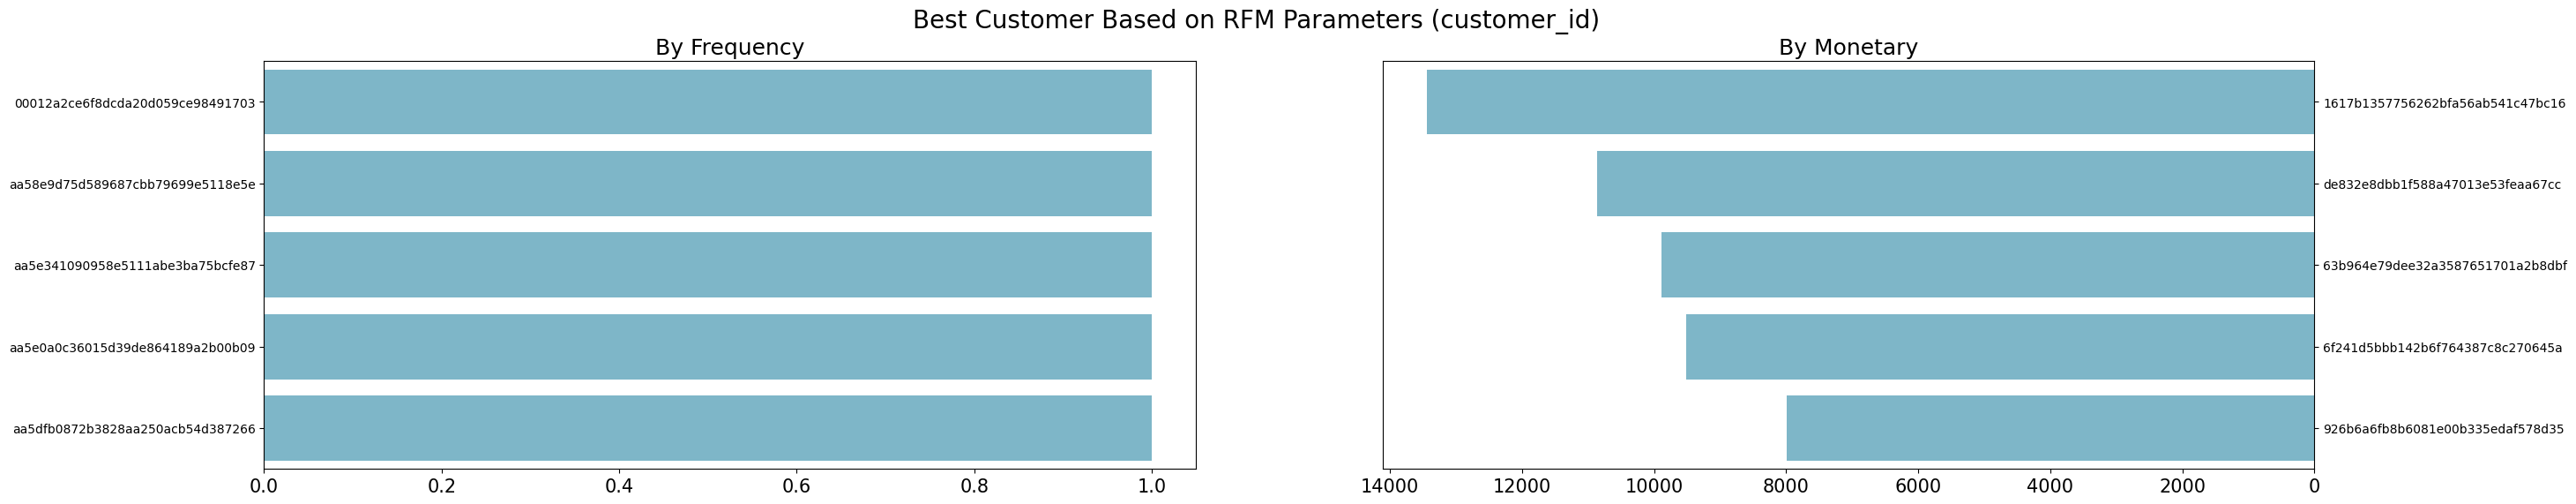

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Frequency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title("By Monetary", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight**
- Rata-rata jarak waktu hingga customer melakukan transaksi ulang adalah 238.4 hari atau 238 hari.
- Rata-rata jumlah customer melakukan transaksi ulang adalah 1 kali.
- Rata-rata revenue yang didapatkan dari seorang customer adalah US$143.23.


# Clustering
Clustering adalah salah satu metode yang dapat dilakukan untuk melihat segmentasi customer. Ini dapat dilakukan untuk melihat kategori customer yang ada berdasarkan faktor-faktor seperti jumlah order dan revenue yang diberikan kepada perusahaan. Dengan mengetahui segmentasi customer, perusahaan dapat membuat strategi yang lebih spesifik untuk meningkatkan bisnis mereka.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [ ]:
# Membuat df untuk clustering
df_clus = df.groupby('customer_id').agg({'order_id': 'count', 'price': 'sum'}).reset_index()

df_clus.head()

customer_id  order_id   price
0  00012a2ce6f8dcda20d059ce98491703         1   89.80
1  000161a058600d5901f007fab4c27140         1   54.90
2  0001fd6190edaaf884bcaf3d49edf079         1  179.99
3  0002414f95344307404f0ace7a26f1d5         1  149.90
4  000379cdec625522490c315e70c7a9fb         1   93.00

In [ ]:
# Fitur yang digunakan
feature = ['order_id', 'price']
x = df_clus[feature].values

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = pd.DataFrame(sc.fit_transform(x))

In [ ]:
# Menggunakan elbow method untuk menentukan cluster
wcss = []
for n in range(1,11):
  kmeans = KMeans(n_clusters = n, init = 'k-means++')
  kmeans.fit(x_sc)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

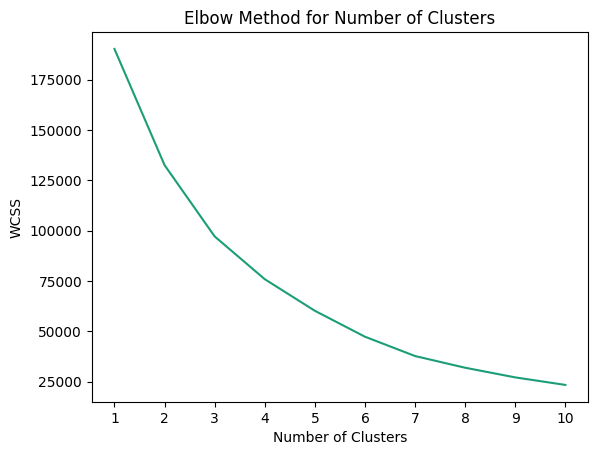

In [ ]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('Elbow Method for Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Membuat model clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(x_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
Cluster = kmeans.fit_predict(x_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menambahkan kolom cluster
df_clus['Cluster'] = kmeans.labels_
df_clus.head()

customer_id  order_id   price  Cluster
0  00012a2ce6f8dcda20d059ce98491703         1   89.80        0
1  000161a058600d5901f007fab4c27140         1   54.90        0
2  0001fd6190edaaf884bcaf3d49edf079         1  179.99        0
3  0002414f95344307404f0ace7a26f1d5         1  149.90        0
4  000379cdec625522490c315e70c7a9fb         1   93.00        0

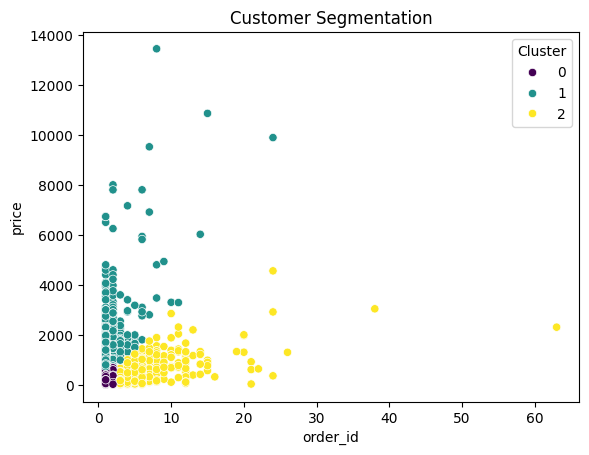

In [ ]:
# Visualisasi cluster
title = 'Customer Segmentation'
plot = sns.scatterplot(data=df_clus, x='order_id', y='price', hue='Cluster', palette='viridis')
plot_title = plt.title(title)

<ipython-input-479-ff7d37d7aed3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')


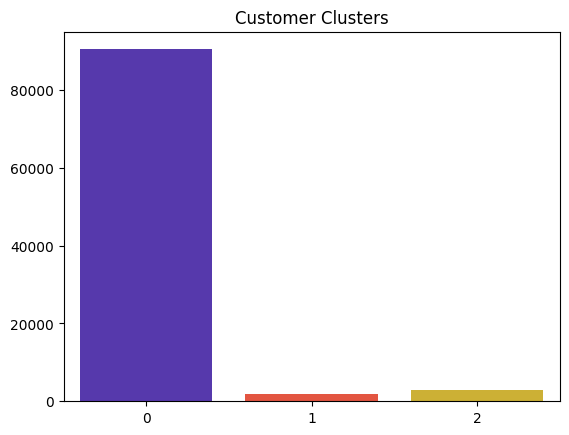

In [ ]:
# Jumlah customer di cluster
data_plot  = df_clus['Cluster'].value_counts().to_list()
label_plot = df_clus['Cluster'].value_counts().index.to_list()

title = 'Customer Clusters'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [ ]:
df_clus['Cluster'].value_counts()

0    90437
2     2839
1     1833
Name: Cluster, dtype: int64

In [ ]:
# Melihat rata-rata jumlah order dan harga order untuk setiap cluster
display(df_clus.groupby('Cluster').agg(['mean']))

<ipython-input-481-724da9d34c3c>:2: FutureWarning: ['customer_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(df_clus.groupby('Cluster').agg(['mean']))


order_id        price
             mean         mean
Cluster                       
0        1.097737   115.105422
1        1.330060  1304.650753
2        4.104614   289.216552

**Insight dan Saran**

Cluster 0 (order dan revenue rendah): Rata-rata order 1 kali dan revenue ke perusahaan sebesar US$115.10
- Fokus pada upaya meningkatkan customer retention, seperti menawarkan program loyalitas, personalized recommendations, dan post-purchase engagement.
- Menganalisis alasan mengapa customer di cluster ini tidak melakukan pembelian ulang. Anda dapat melakukan survey, menganalisis data customer journey, dan mempelajari feedback customer untuk memahami alasan churn dan mencari solusi untuk mengatasinya.
- Menawarkan program khusus untuk mendorong customer di cluster ini melakukan pembelian lebih sering, seperti diskon khusus, free shipping, atau bundling produk yang menarik.

Cluster 1 (order tinggi dan revenue sedang): Rata-rata order 4 kali dan revenue ke perusahaan sebesar US$289.22
- Meningkatkan nilai transaksi rata-rata dengan menawarkan bundling produk, upselling, dan cross-selling.
- Menggunakan data customer untuk menawarkan produk yang relevan berdasarkan pembelian sebelumnya, memberikan rekomendasi yang dipersonalisasi, dan berkomunikasi dengan mereka melalui channel yang mereka sukai.
- Memberikan reward kepada customer di cluster ini yang sering melakukan pembelian dan memberikan feedback positif. Tawarkan juga program loyalty yang menarik untuk mendorong mereka menjadi customer loyal.

Cluster 2 (order rendah dan revenue tinggi): Rata-rata order 1 kali dan revenue ke perusahaan sebesar US$1,304.65
- Customer di cluster ini kemungkinan besar adalah customer yang memberikan kontribusi besar bagi revenue perusahaan. Fokus untuk mempertahankan customer ini dengan memberikan layanan terbaik, menawarkan program loyalitas yang menarik, dan membangun hubungan yang baik dengan mereka.
- Menawarkan program premium kepada customer di cluster ini dengan benefit yang eksklusif, seperti akses awal ke produk baru, diskon spesial, dan layanan customer priority.


# Membuat Dashboard Sederhana dengan Streamlit

In [ ]:
# Menyimpan dataset baru
df.to_csv("all_data.csv", index=False)

# **Conclusion**

Dari insight yang telah didapatkan dari data, terlihat bahwa secara keseluruhan perusahaan berada di posisi yang baik, tetapi mengingat adanya beberapa masalah dan kekurangan, beberapa saran dibawah dapat dipertimbangkan untuk meningkatkan performa perusahaan:
- Pertahankan rating baik dengan meningkatkan kualitas barang, pengiriman, dan hal yang berkaitan.

- Mengingat ada sejumlah customer yang memberikan rating 1, maka harus diperhatikan feedback yang diberikan dan mempercepat layanan customer jika diperlukan.
- Menyelidiki alasan pembatalan dan mencari solusi untuk mencegahnya terjadi lagi.
- Fokus pada pasar di Sao Paulo dengan menawarkan promosi khusus, meningkatkan layanan pengiriman, dan memperkuat branding di sana.
- Memperluas jangkauan ke kota-kota yang memiliki sedikit customer dan seller dengan menawarkan program menarik untuk menarik customer dan seller baru.
- Dibutuhkan data demografis customer untuk menganalisa behaviour mereka lebih lanjut.
- Meningkatkan engagement dengan customer aktif melalui program loyalitas, penawaran khusus, dan konten yang menarik agar customer aktif tetap setia berbelanja pada aplikasi e-commerce.
- Menawarkan promo menarik, email reminder, atau personalisasi rekomendasi produk untuk menarik kembali customer yang tidak aktif.
- Menerapkan sistem rekomendasi barang dan menawarkan promo menarik untuk meningkatkan penjualan dan menarik customer untuk melakukan lebih banyak order.
- Memberikan penghargaan kepada seller top untuk memotivasi mereka dan meningkatkan kualitas layanan mereka.
- Membantu seller yang mendapat sedikit order untuk meningkatkan performa dengan menyediakan pelatihan, optimasi listing produk, dan program promosi.
- Mengadakan promo, meningkatkan marketing campaign, dan menawarkan diskon khusus untuk meningkatkan penjualan di bulan tertentu.
- Menganalisis faktor yang berkontribusi pada revenue tinggi di bulan tertentu seperti produk terlaris, strategi marketing yang efektif, dan tren pasar.
- Lebih mempromosikan produk yang laris dengan meningkatkan visibilitasnya di aplikasi, dan menawarkan bundling dengan produk lain.
- Menyediakan pilihan pembayaran yang sesuai dengan preferensi customer (pada kasus ini, credit card) untuk berbagai produk.
- Mendorong seller untuk merespon order lebih cepat dengan memberikan edukasi tentang manfaat respon cepat, seperti meningkatkan customer satisfaction dan penjualan
- Membantu seller dalam meningkatkan proses pengiriman dengan menyediakan panduan dan solusi logistik yang efisien.
- Memonitor performa dan bekerja sama dengan ekspedisi di beberapa kota yang memiliki waktu pengiriman yang lama untuk meningkatkan kecepatan pengiriman di area tersebut.
- Mendorong seller untuk membalas review sebagai bentuk apresiasi kepada customer dan membangun hubungan yang baik.
- Meningkatkan customer retention dengan menawarkan program loyalitas, personalized recommendations, dan post-purchase engagement.
- Meningkatkan nilai transaksi rata-rata dengan menawarkan bundling produk, upselling, dan cross-selling.